# 1 day ahead prediction:

First the directional accuracy is calculated with respect to the true denoised value: The high accuracy (+-85% accross all pairs) is expected since the data shows high autocorrelation.

However to truly reflect real-life usecase it is important to compare the predicted denoised value with the actual noisy value, to see if the models predictions can be implemented to make informed trading decisions. The results decline as expected, however with a forecasting accuracy of +-60% for all pairs --- the results show the effectiveness of the models predictions and the practical value it provides with regards to forecasting future price trends.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_accuracy(file_path):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Check if the signs of 'Predicted' and 'Actual' are correct
    data['Correct'] = np.where((data['Predicted'] > data['Actual'].shift()) & (data['Actual'] < data['Actual'].shift()), 1,
                               np.where((data['Predicted'] < data['Actual'].shift()) & (data['Actual'] > data['Actual'].shift()), 1, 0))
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > data['Actual'].shift()) & (data['Actual'] < data['Actual'].shift()))
    TN = np.sum((data['Predicted'] < data['Actual'].shift()) & (data['Actual'] > data['Actual'].shift()))
    FP = np.sum((data['Predicted'] > data['Actual'].shift()) & (data['Actual'] > data['Actual'].shift()))
    FN = np.sum((data['Predicted'] < data['Actual'].shift()) & (data['Actual'] < data['Actual'].shift()))
    
    return accuracy, TP, TN, FP, FN

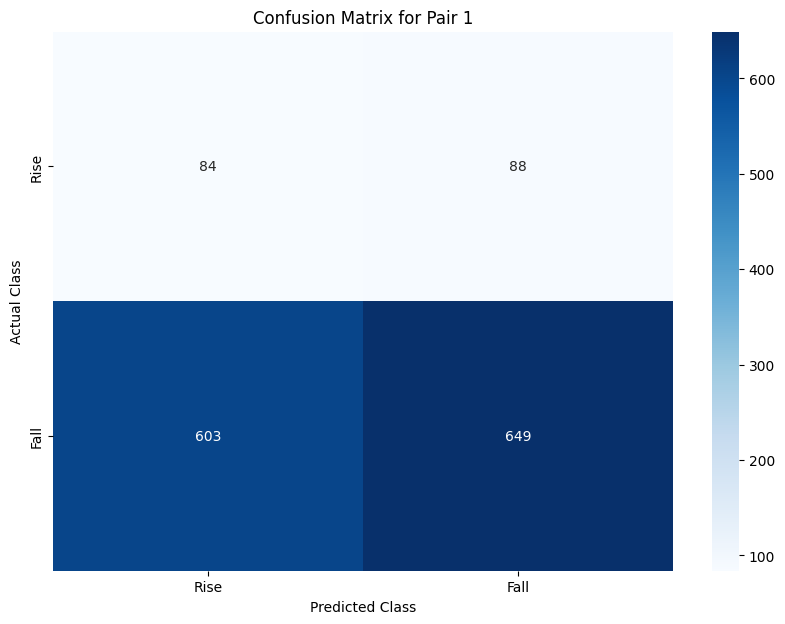

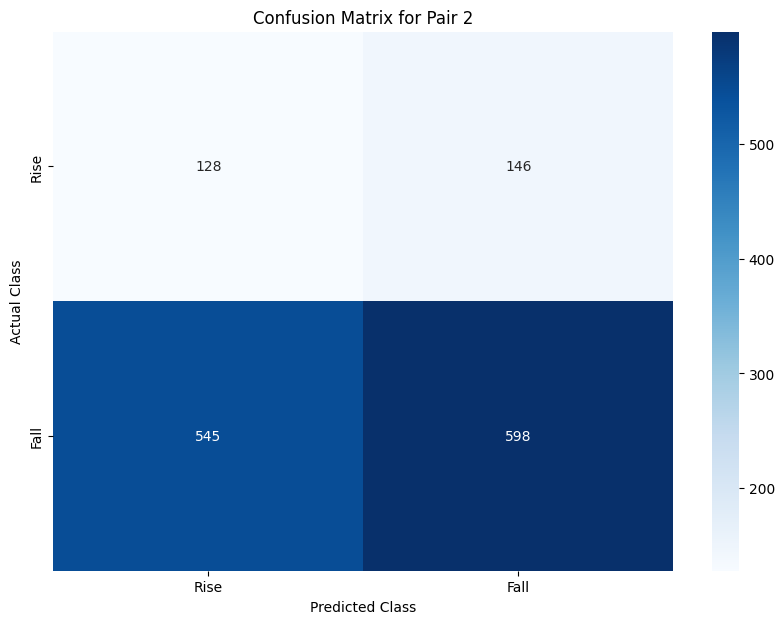

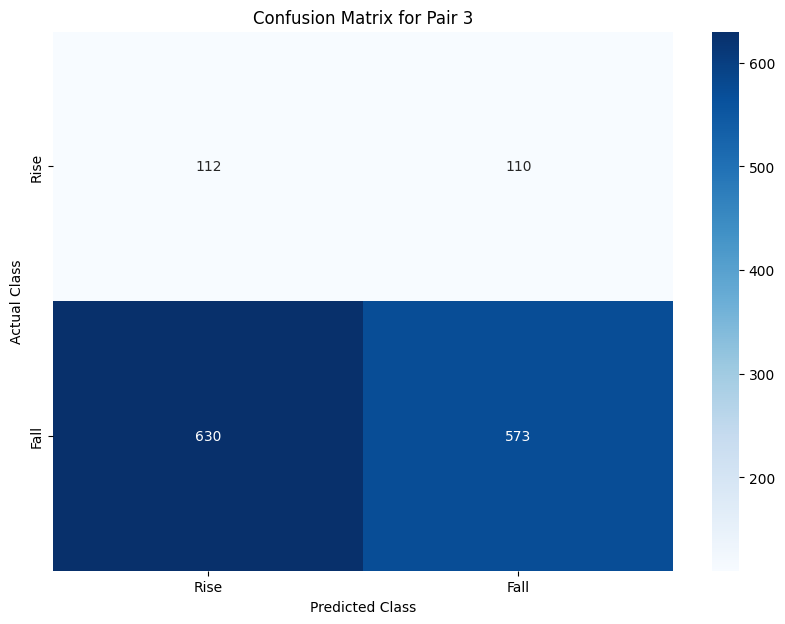

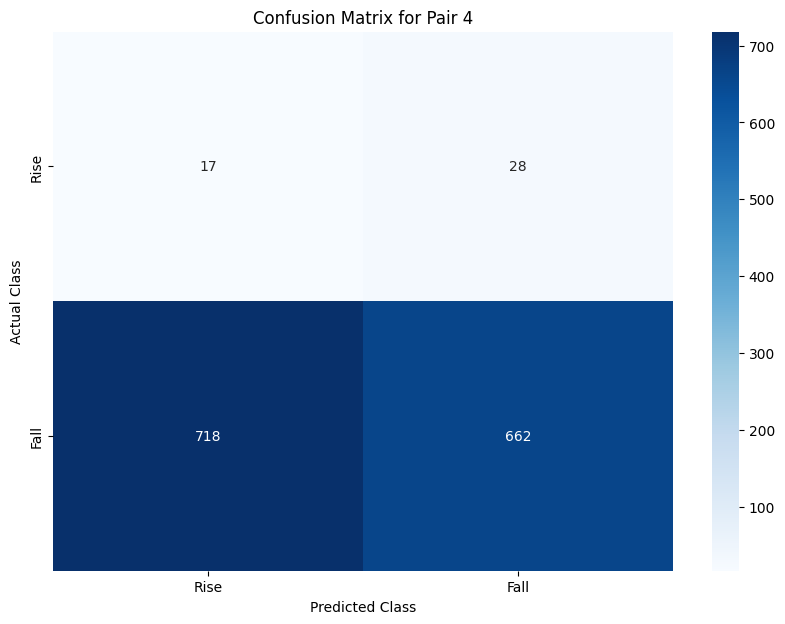

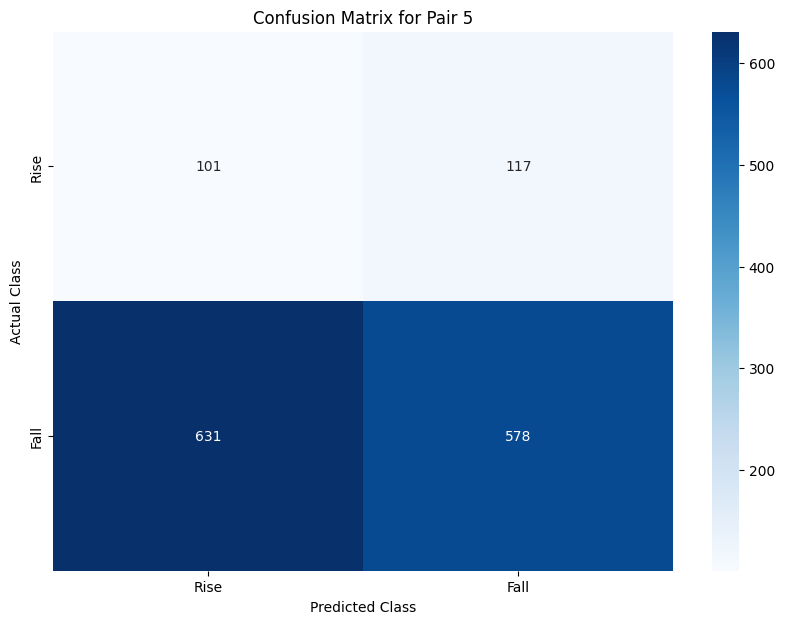

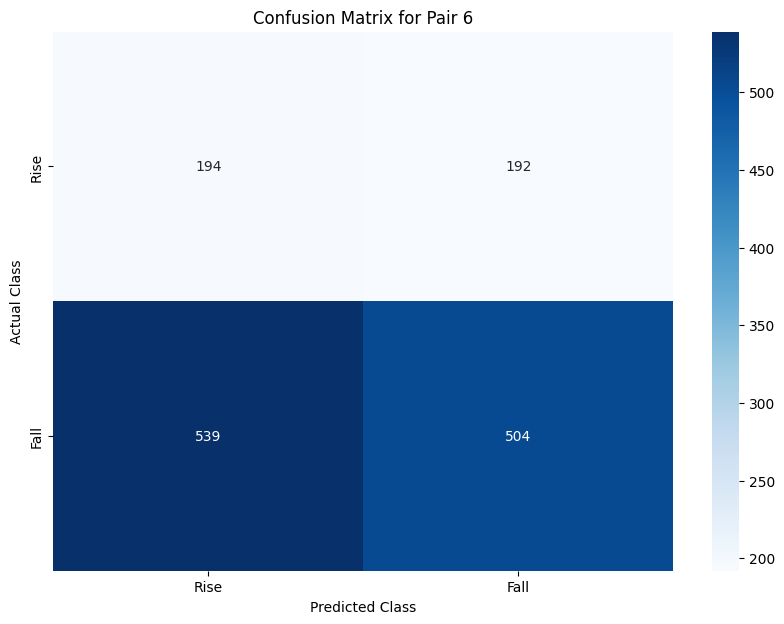

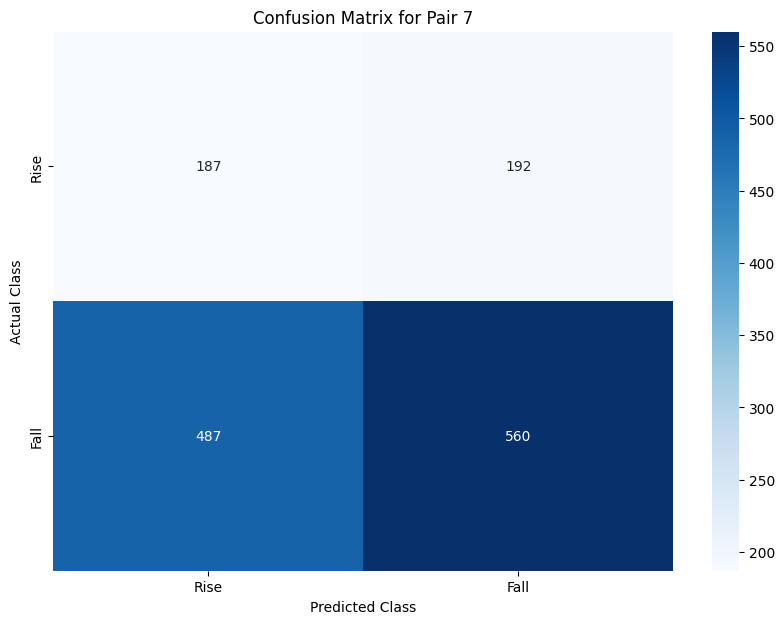

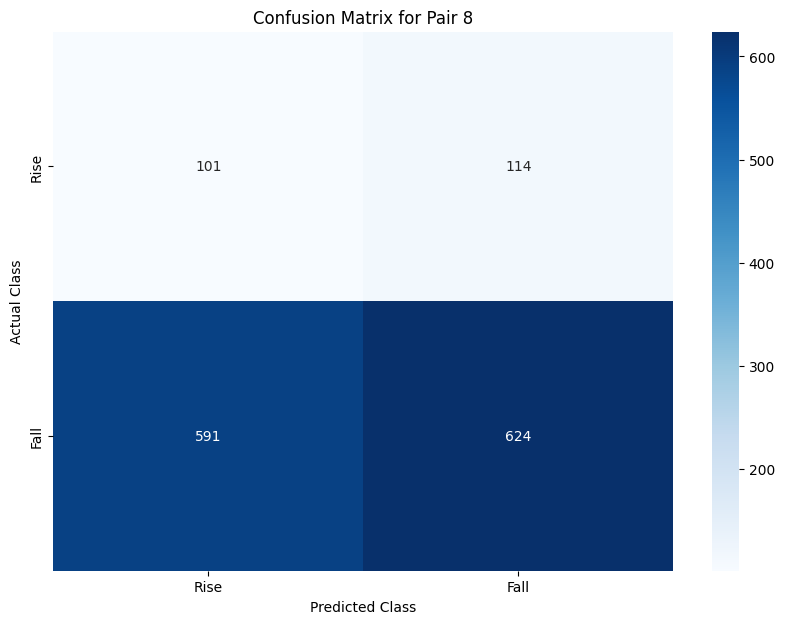

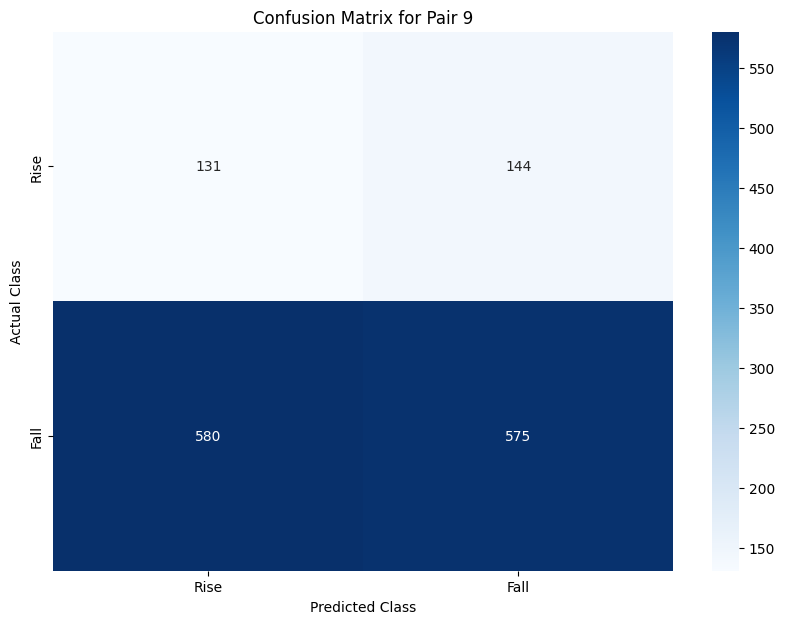

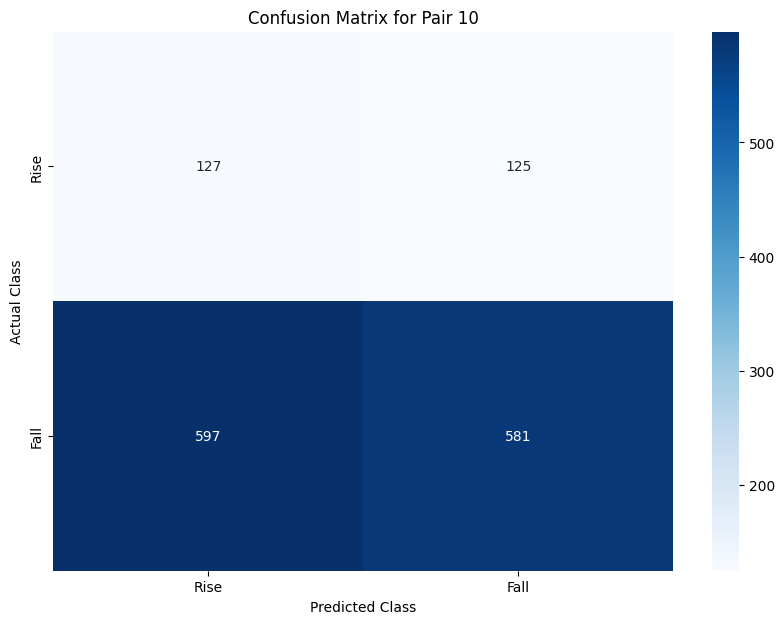

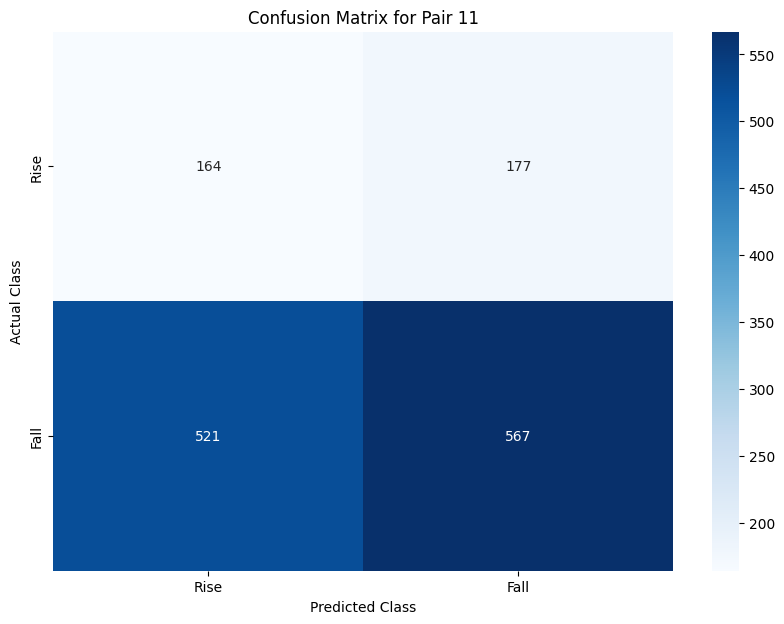

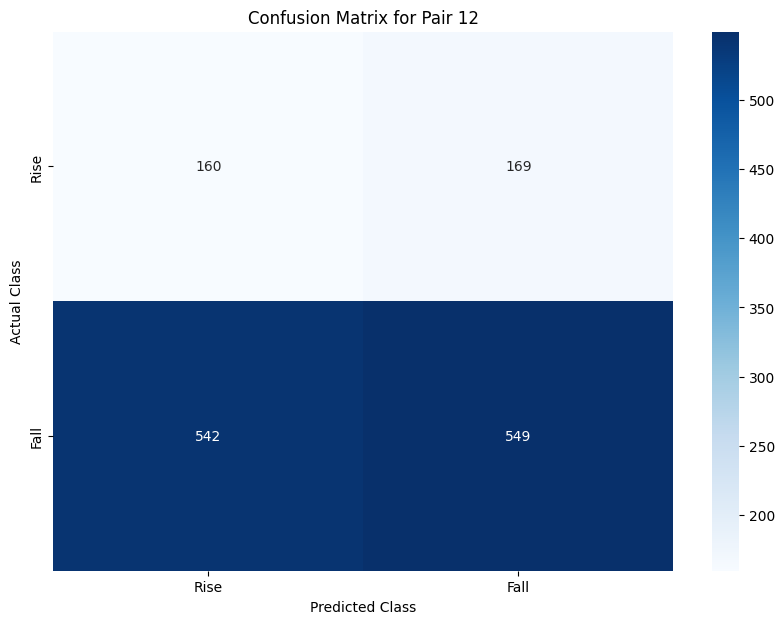

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.512229   84  649   88  603
1      2  0.507338  128  598  146  545
2      3  0.478686  112  573  110  630
3      4  0.474493   17  662   28  718
4      5  0.474493  101  578  117  631
5      6  0.487771  194  504  192  539
6      7  0.522013  187  560  192  487
7      8  0.506639  101  624  114  591
8      9  0.493361  131  575  144  580
9     10  0.494759  127  581  125  597
10    11  0.510832  164  567  177  521
11    12  0.495458  160  549  169  542


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend_denoised.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

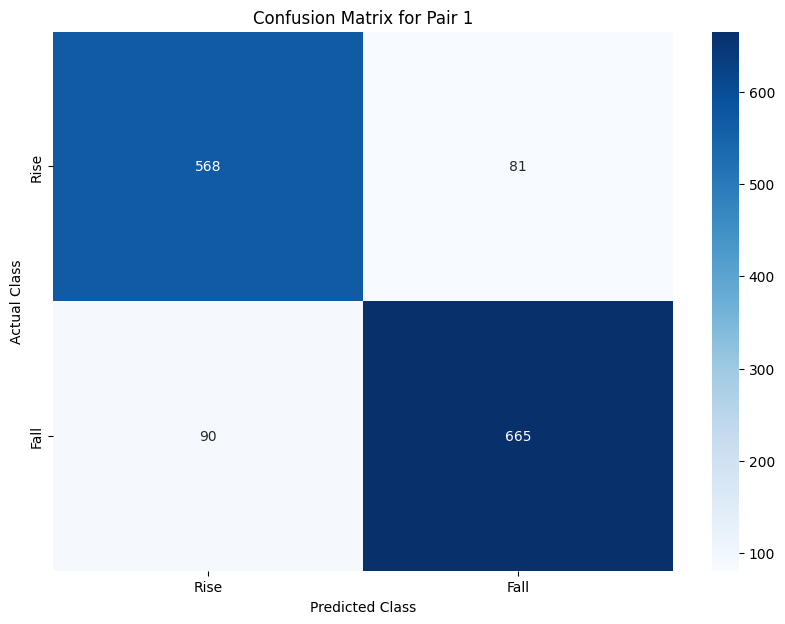

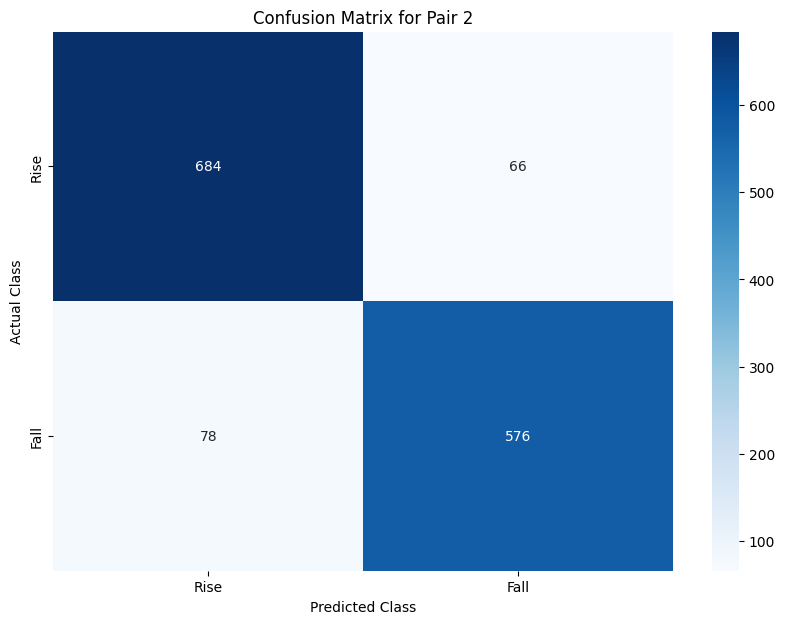

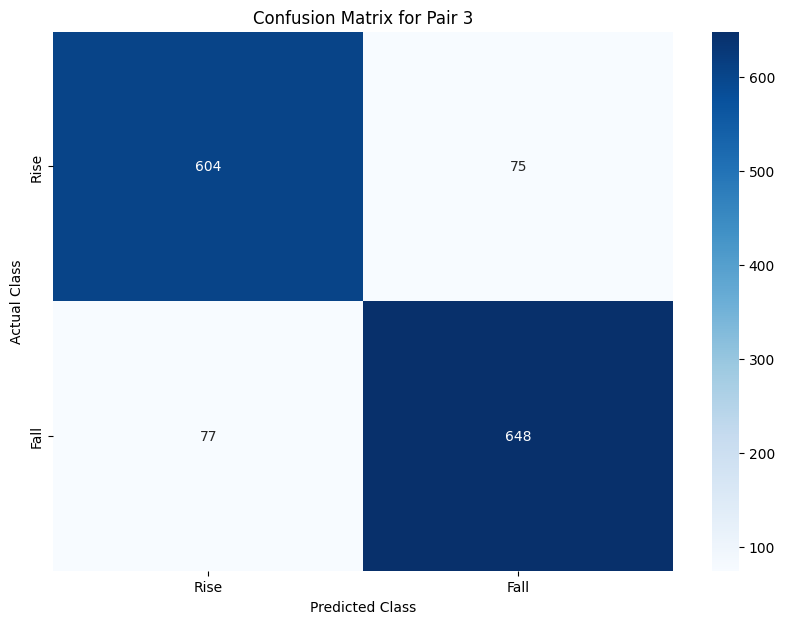

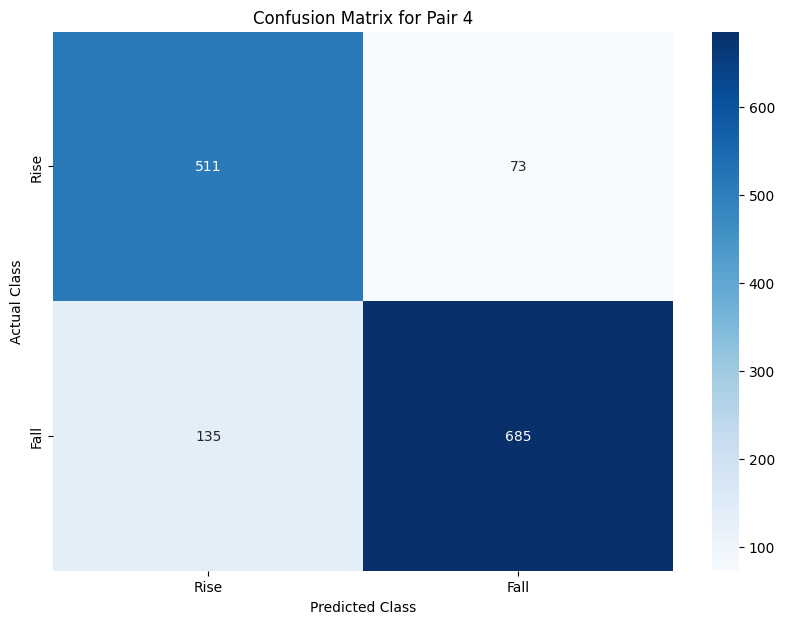

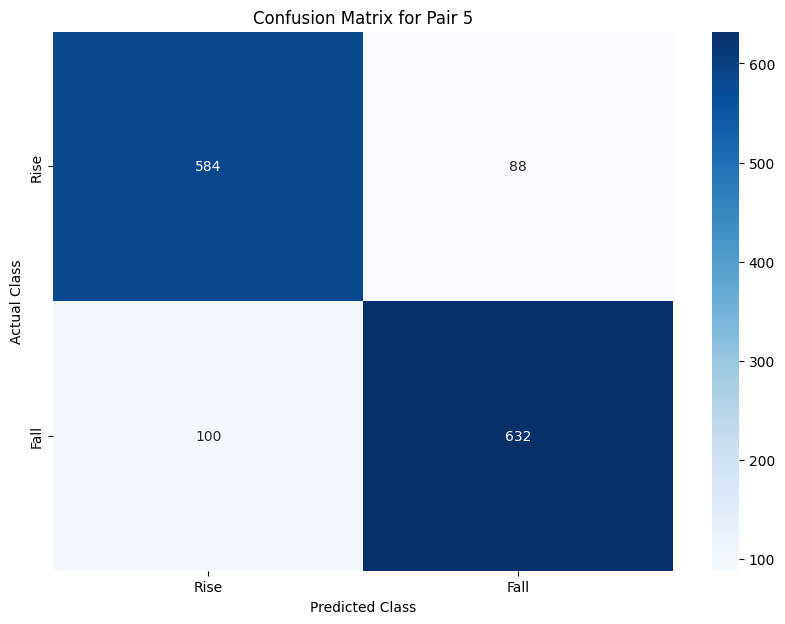

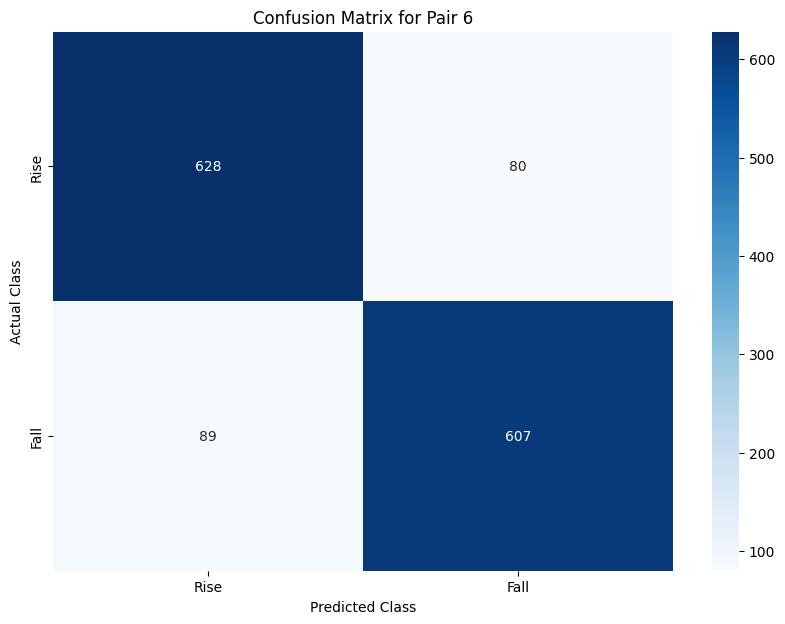

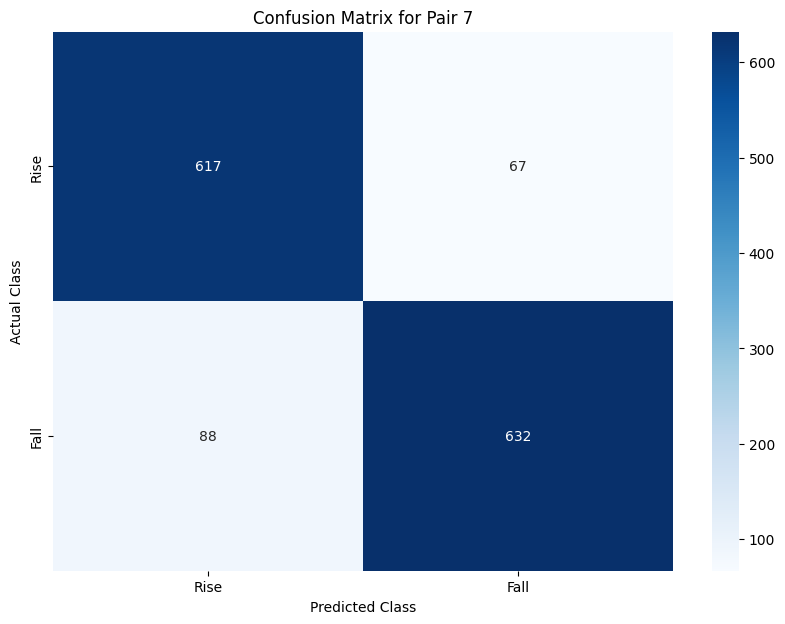

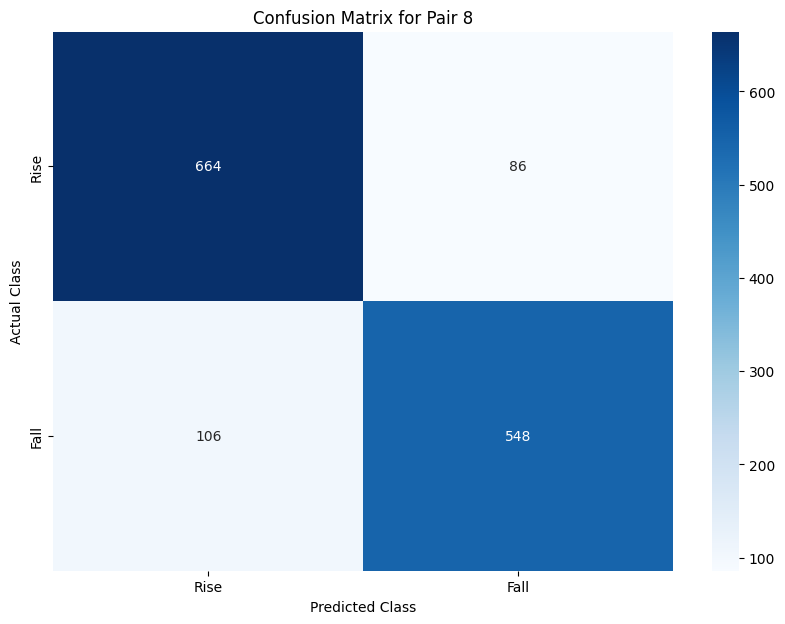

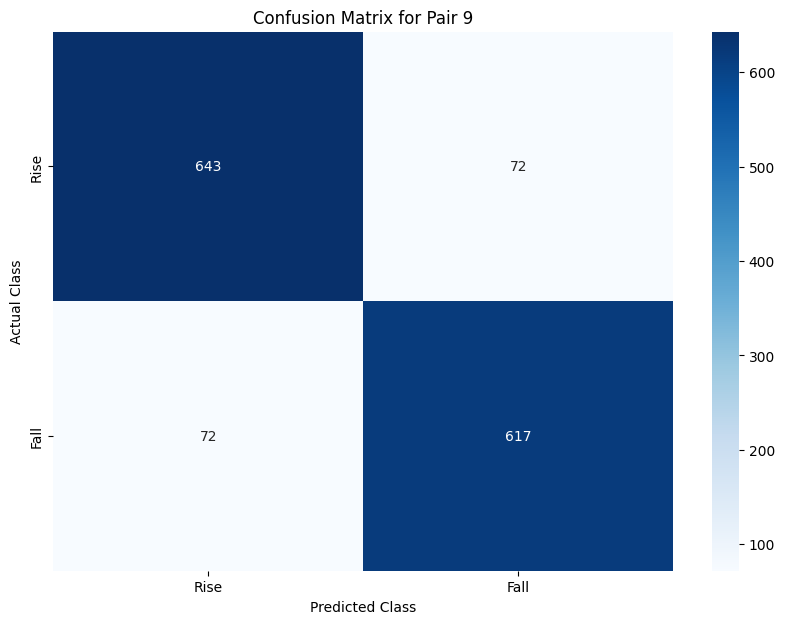

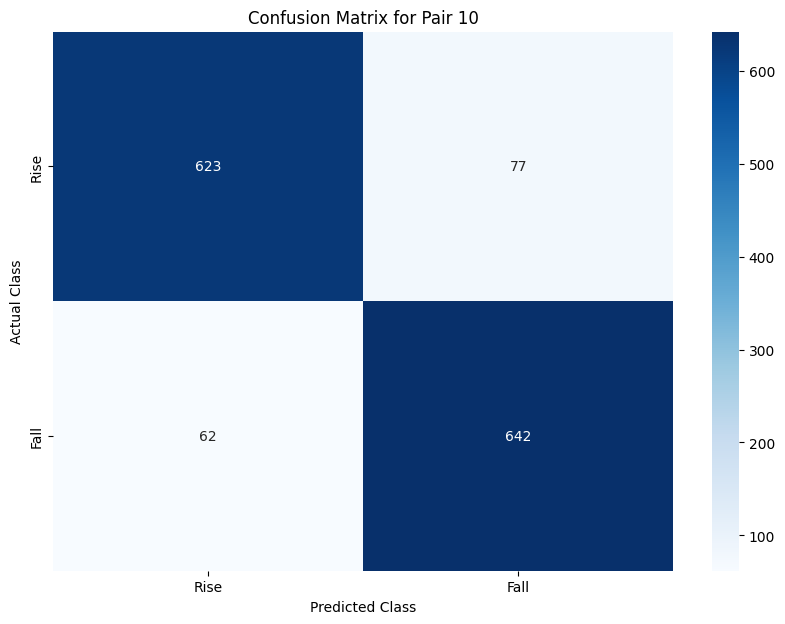

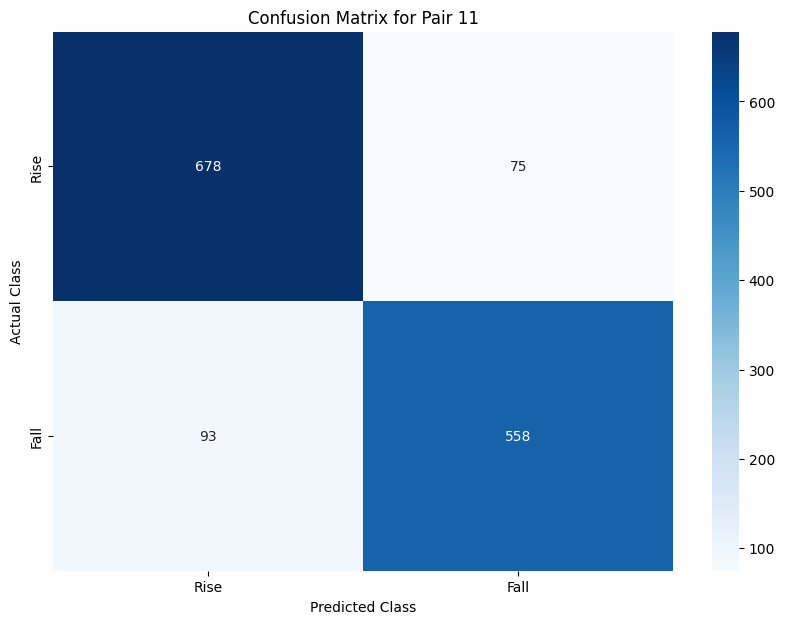

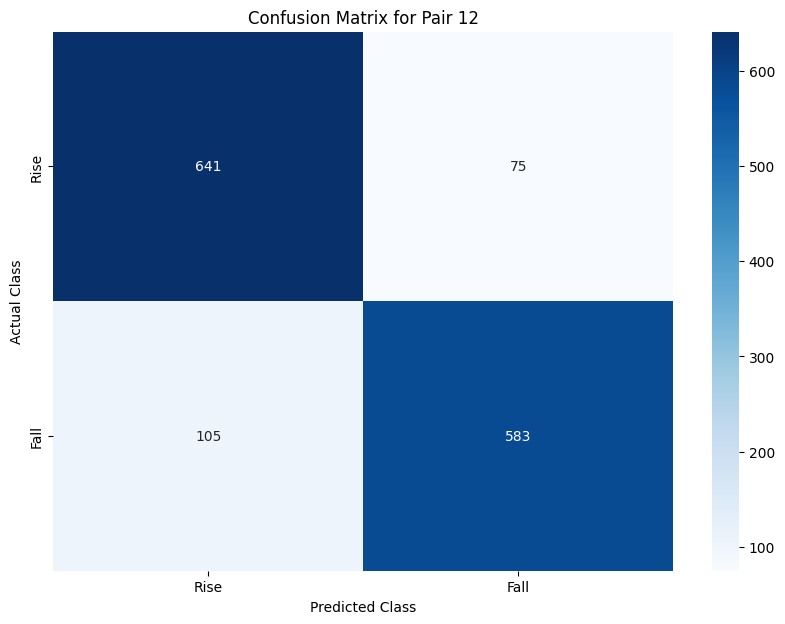

    Pair  Accuracy   TP   TN  FP   FN
0      1  0.878205  568  665  81   90
1      2  0.897436  684  576  66   78
2      3  0.891738  604  648  75   77
3      4  0.851852  511  685  73  135
4      5  0.866097  584  632  88  100
5      6  0.879630  628  607  80   89
6      7  0.889601  617  632  67   88
7      8  0.863248  664  548  86  106
8      9  0.897436  643  617  72   72
9     10  0.900997  623  642  77   62
10    11  0.880342  678  558  75   93
11    12  0.871795  641  583  75  105


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend_denoised.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

### 128 day window for wavelet function calculation

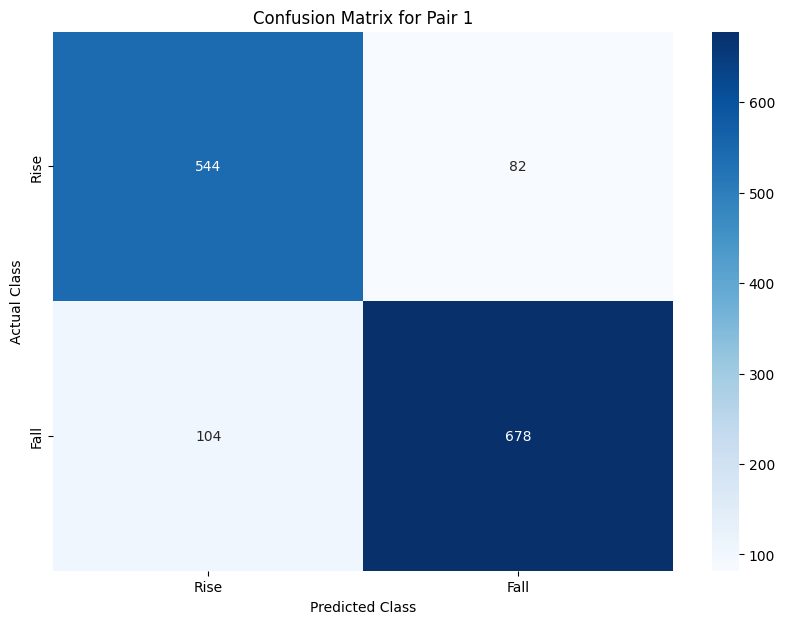

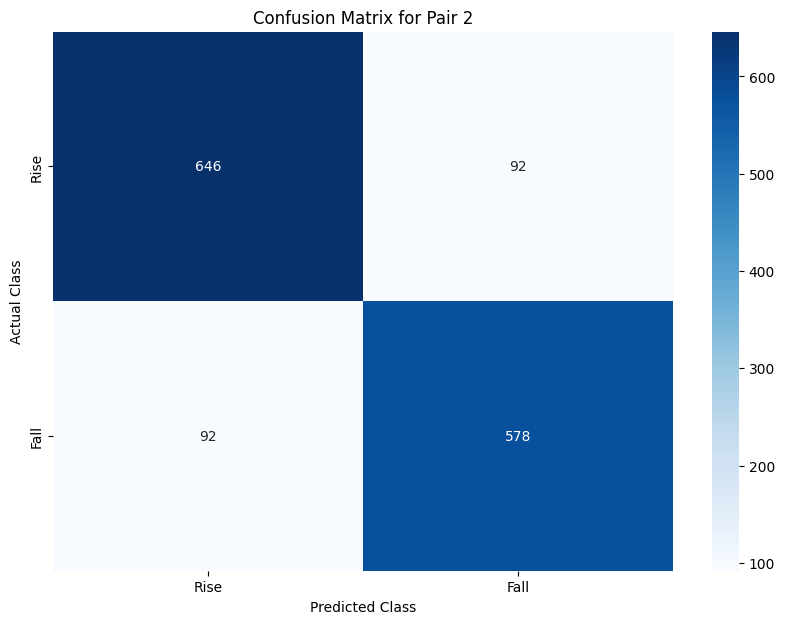

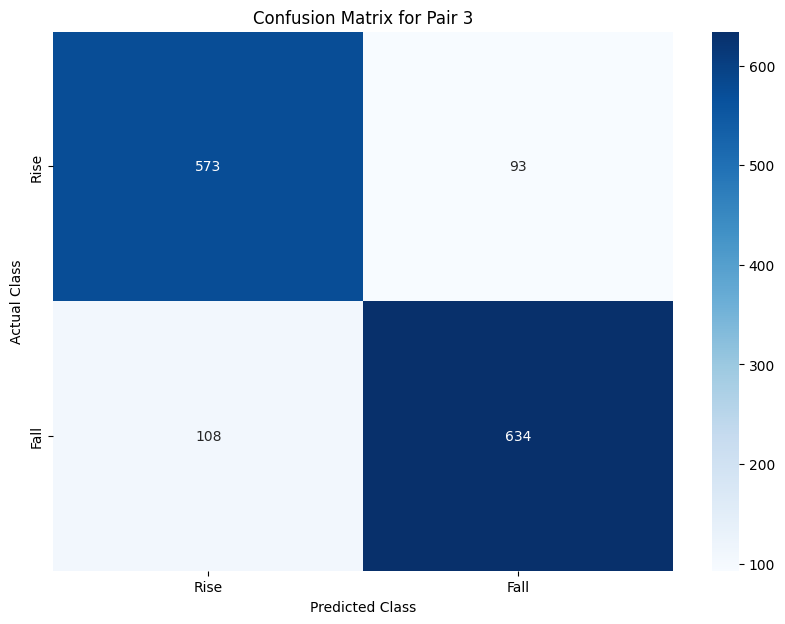

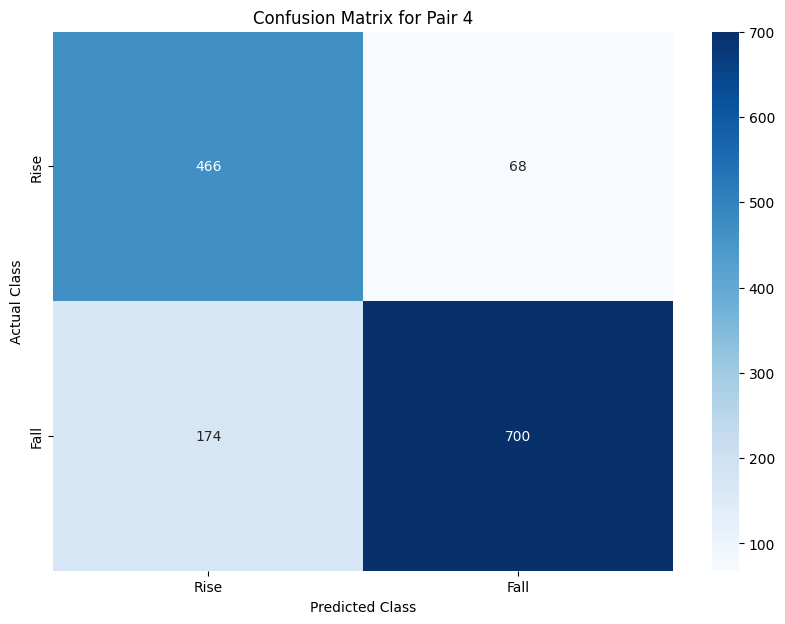

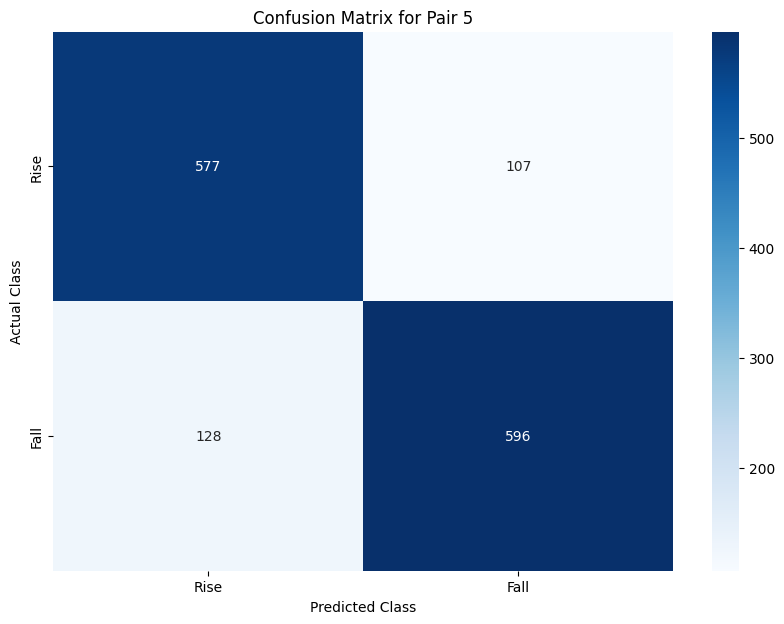

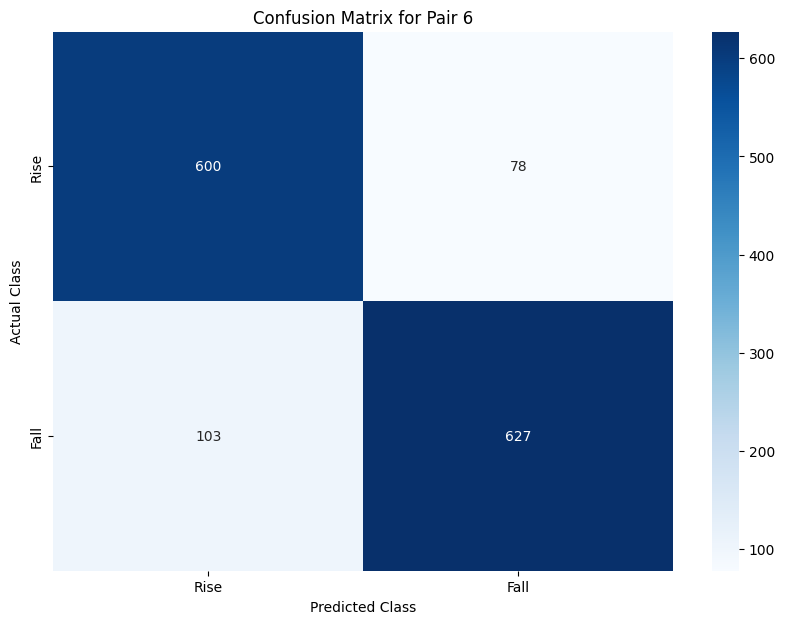

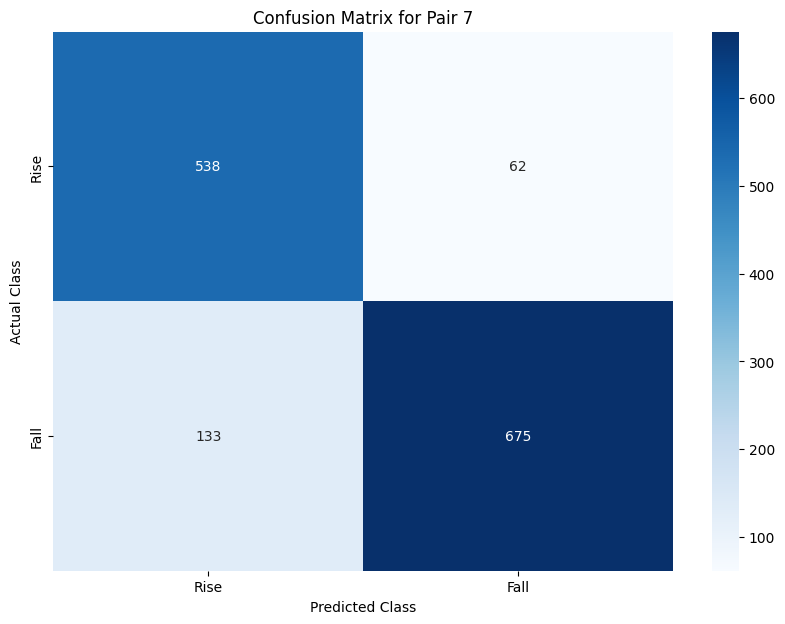

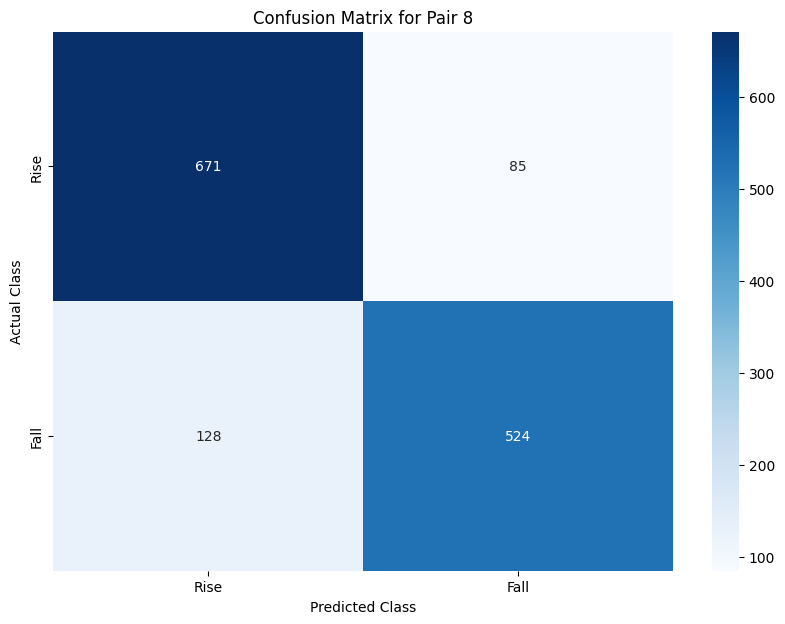

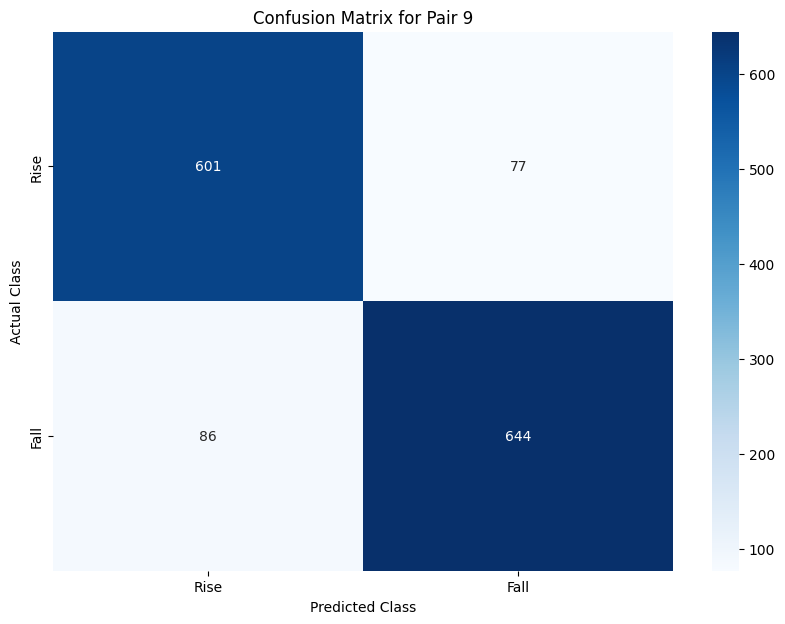

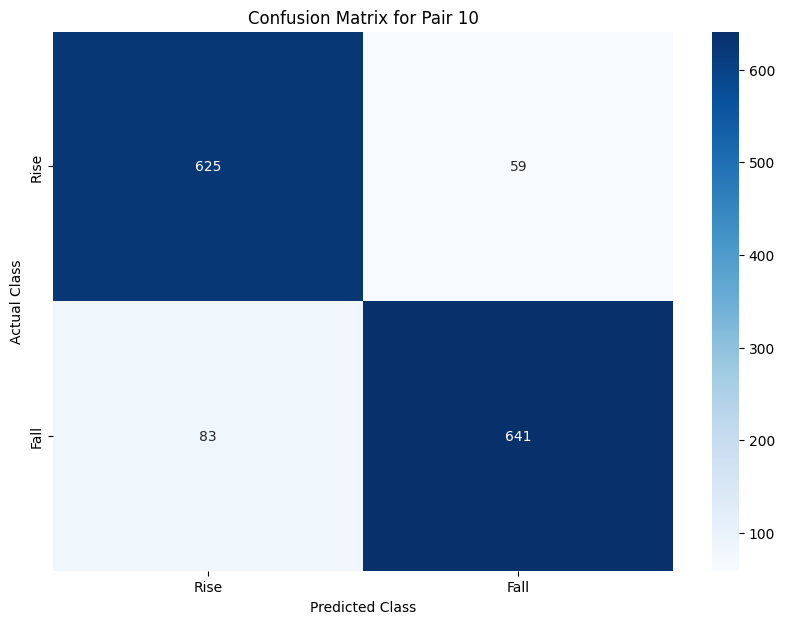

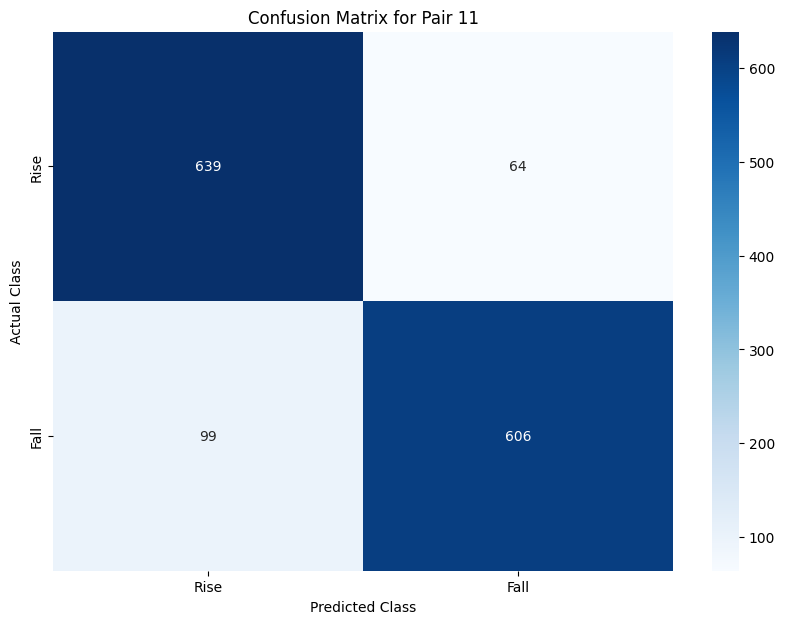

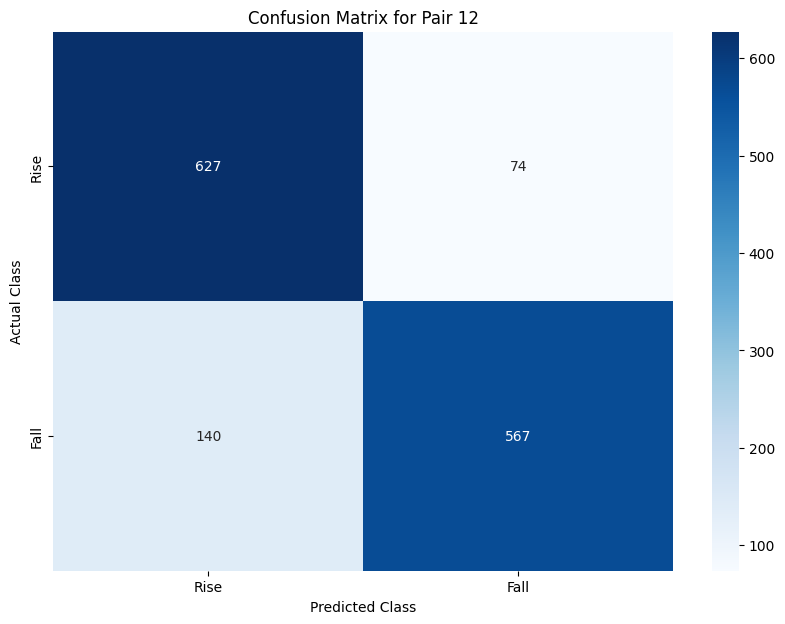

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.867898  544  678   82  104
1      2  0.869318  646  578   92   92
2      3  0.857244  573  634   93  108
3      4  0.828125  466  700   68  174
4      5  0.833097  577  596  107  128
5      6  0.871449  600  627   78  103
6      7  0.861506  538  675   62  133
7      8  0.848722  671  524   85  128
8      9  0.884233  601  644   77   86
9     10  0.899148  625  641   59   83
10    11  0.884233  639  606   64   99
11    12  0.848011  627  567   74  140


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

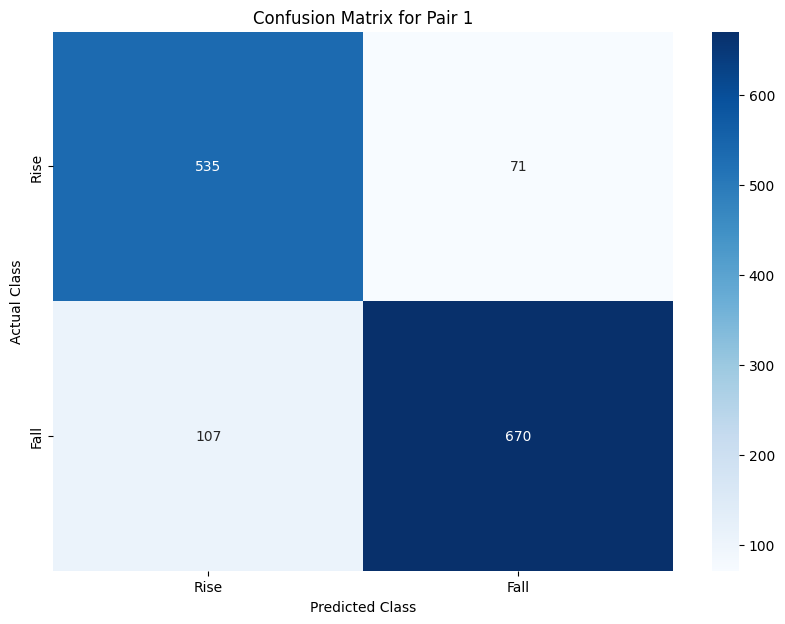

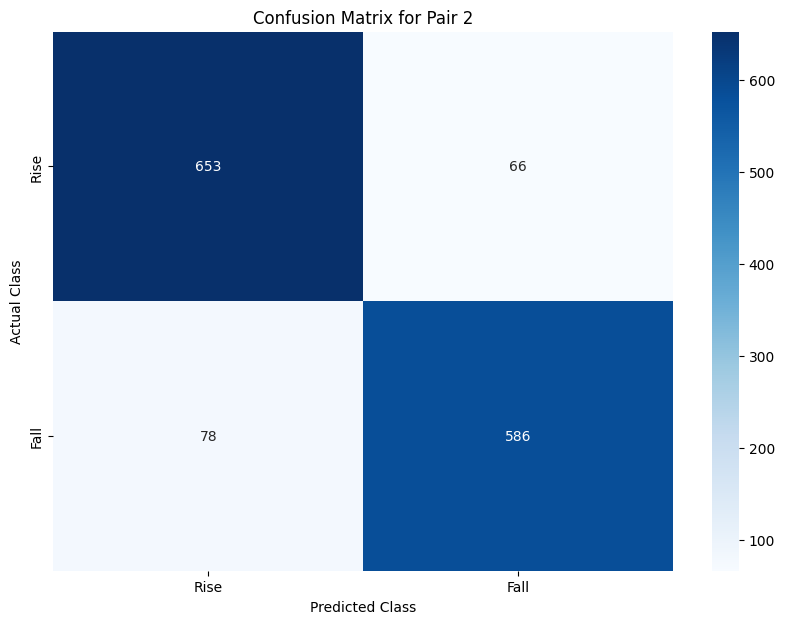

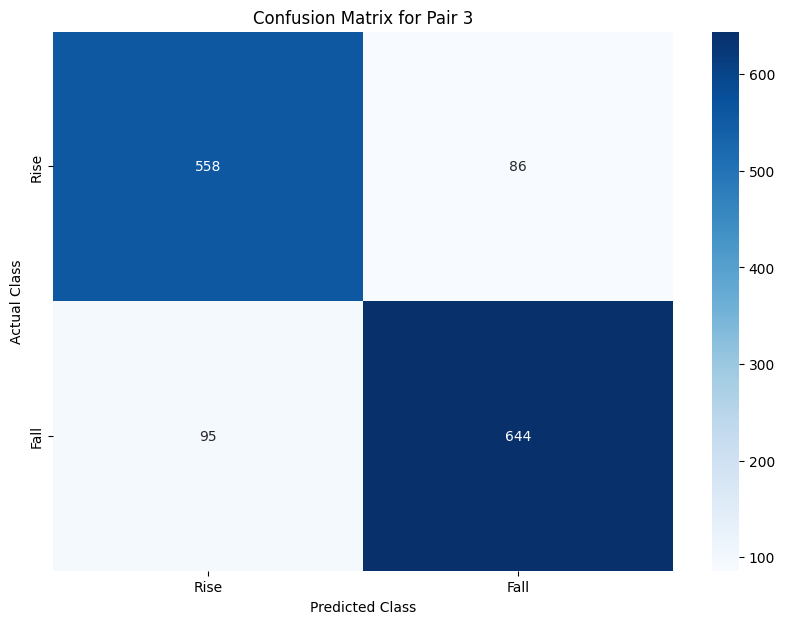

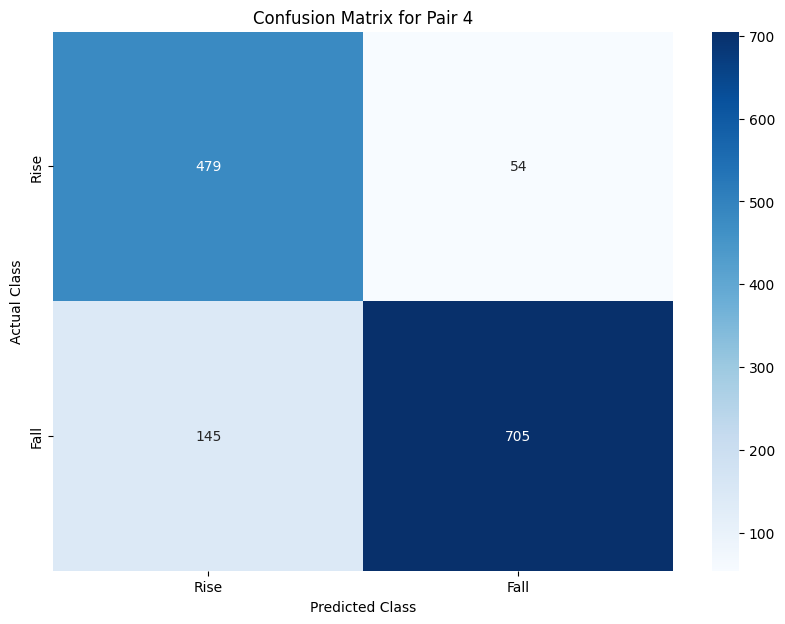

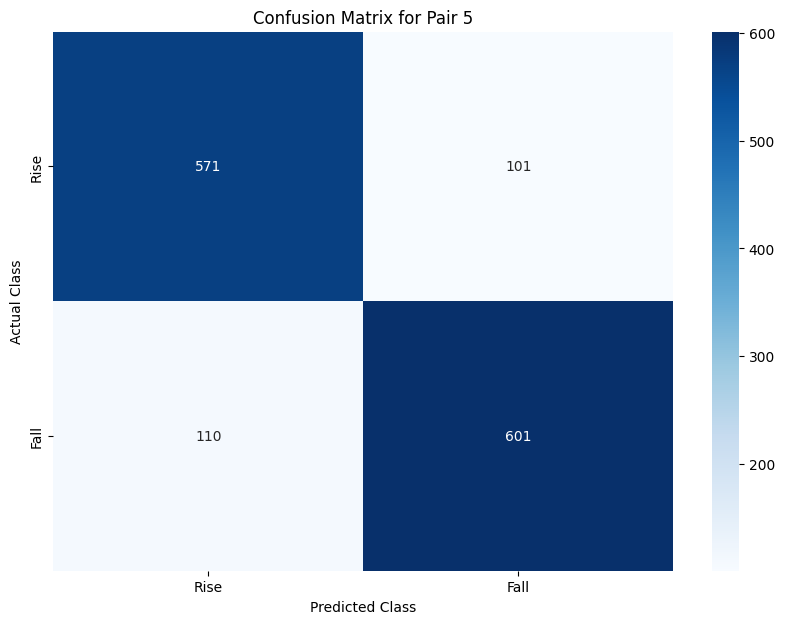

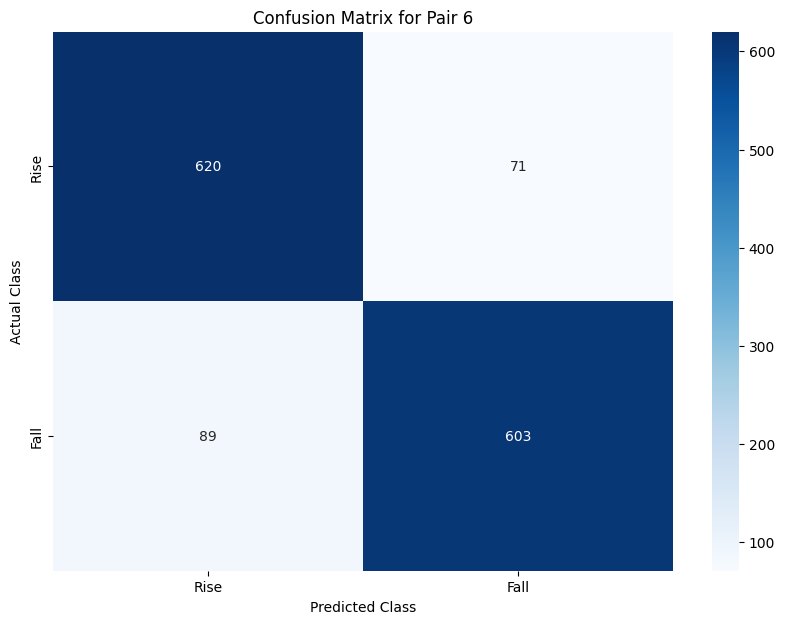

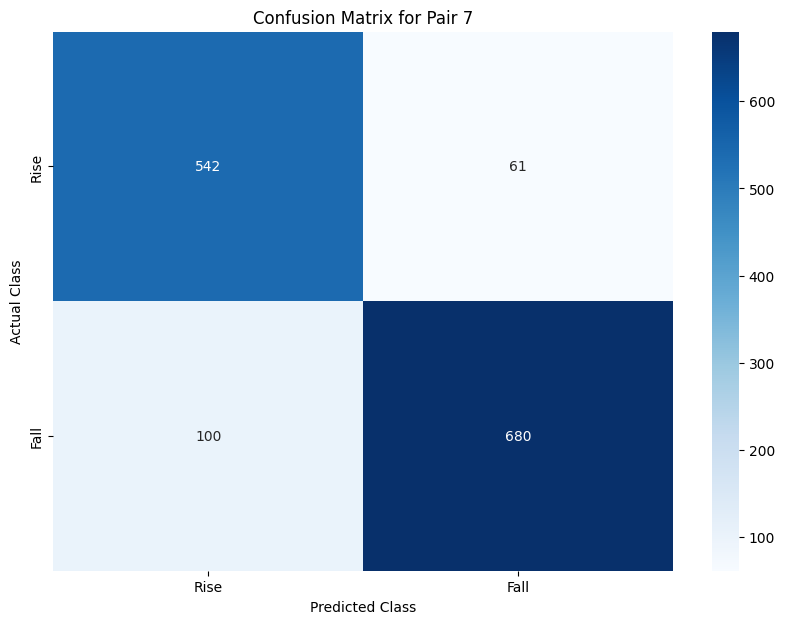

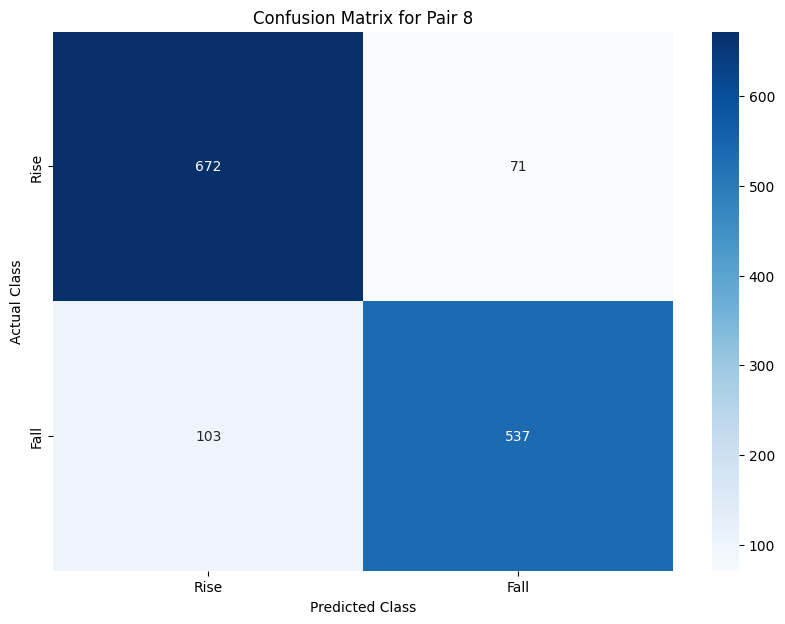

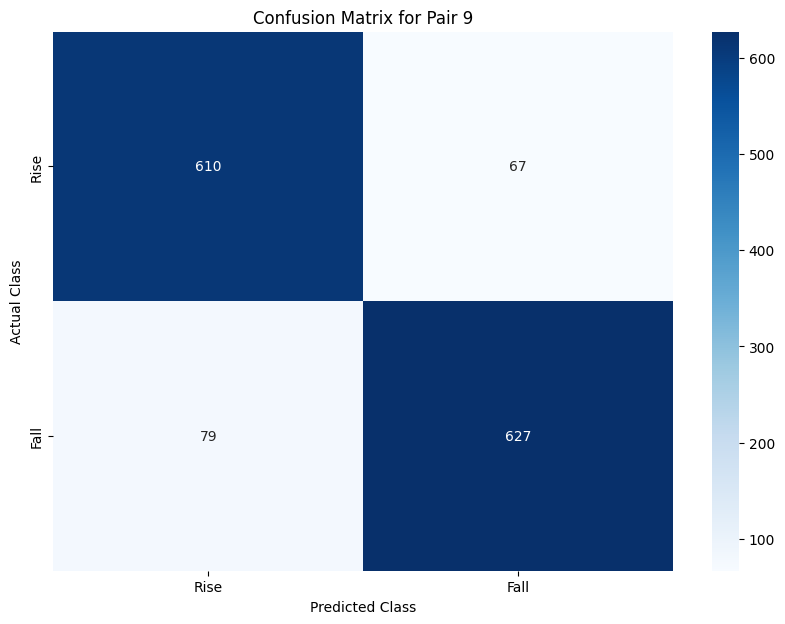

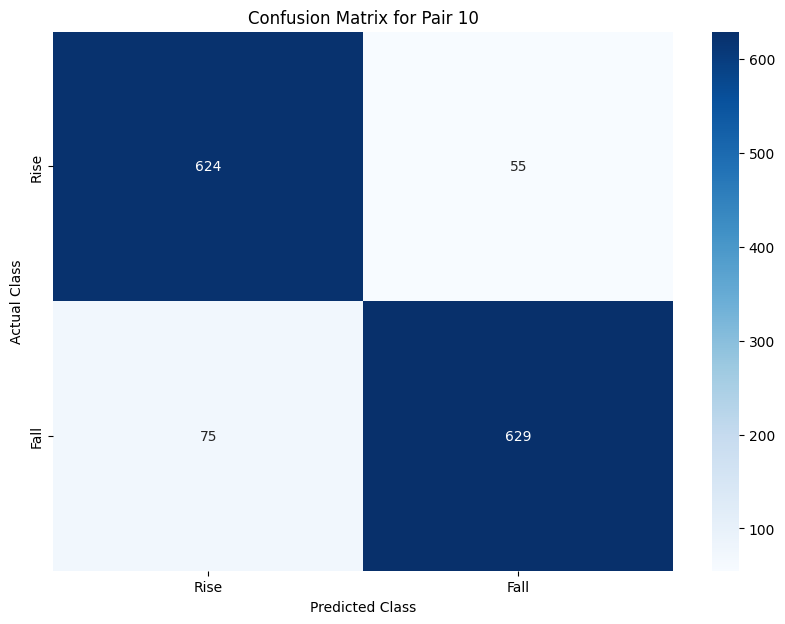

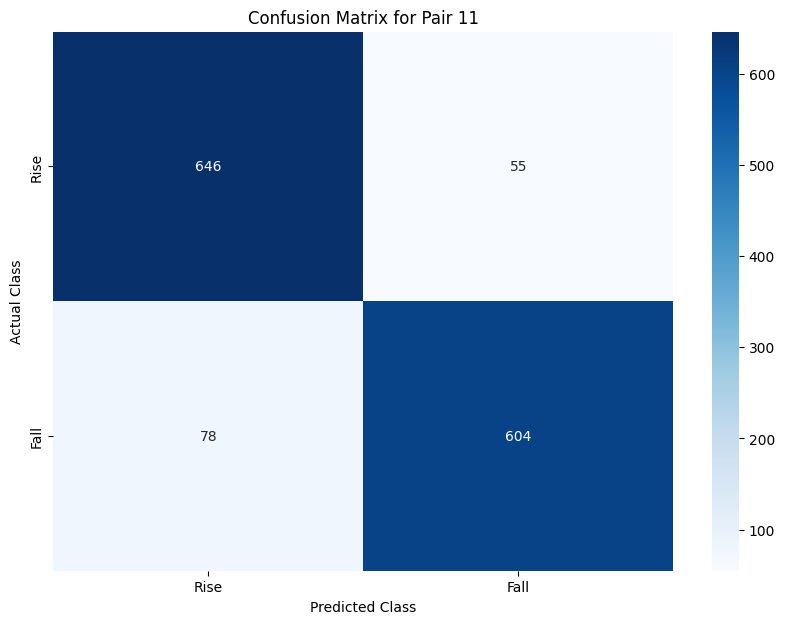

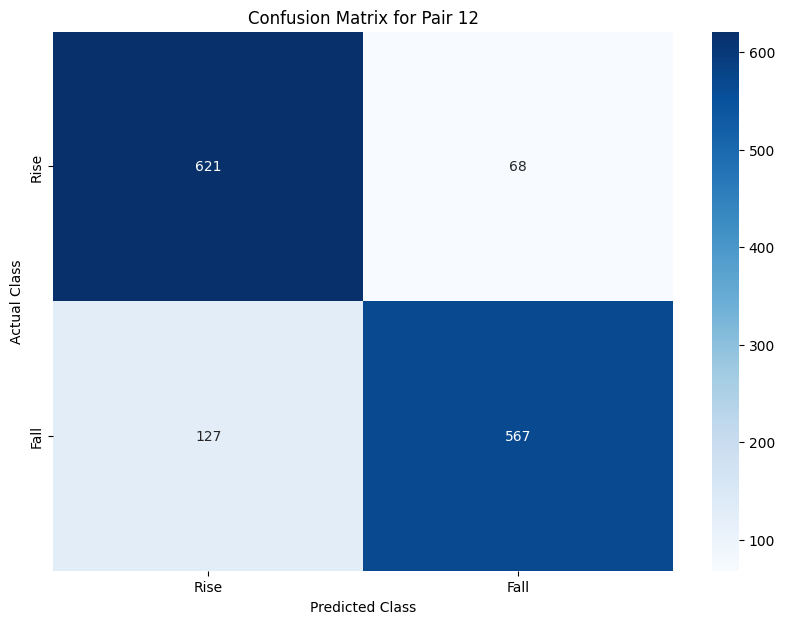

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.871294  535  670   71  107
1      2  0.895879  653  586   66   78
2      3  0.869125  558  644   86   95
3      4  0.856110  479  705   54  145
4      5  0.847433  571  601  101  110
5      6  0.884309  620  603   71   89
6      7  0.883586  542  680   61  100
7      8  0.874187  672  537   71  103
8      9  0.894432  610  627   67   79
9     10  0.906001  624  629   55   75
10    11  0.903832  646  604   55   78
11    12  0.859002  621  567   68  127


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}_trend_denoised.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

1000 day window for wavelet function calculation

# 3 day ahead price forecast

## 128 day window -wavelet

## Comparing predicted denoised values to actual noisy values (Practical)

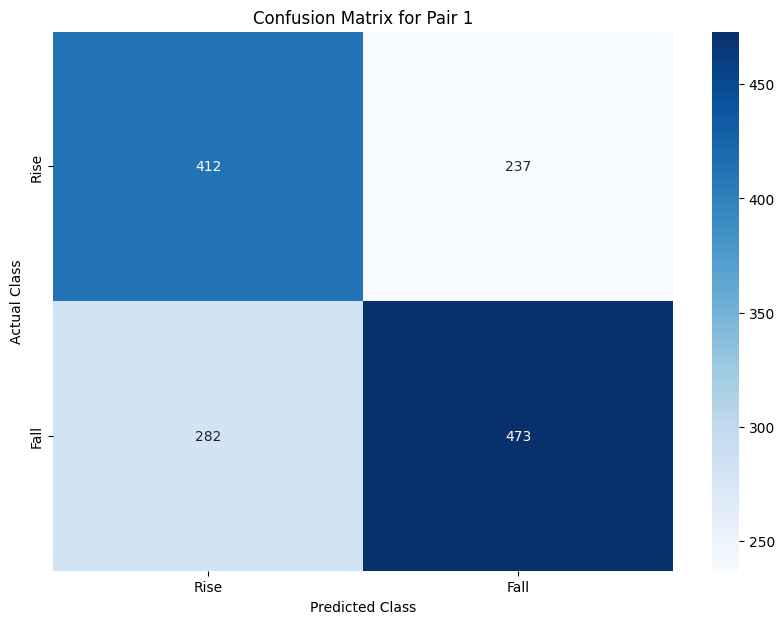

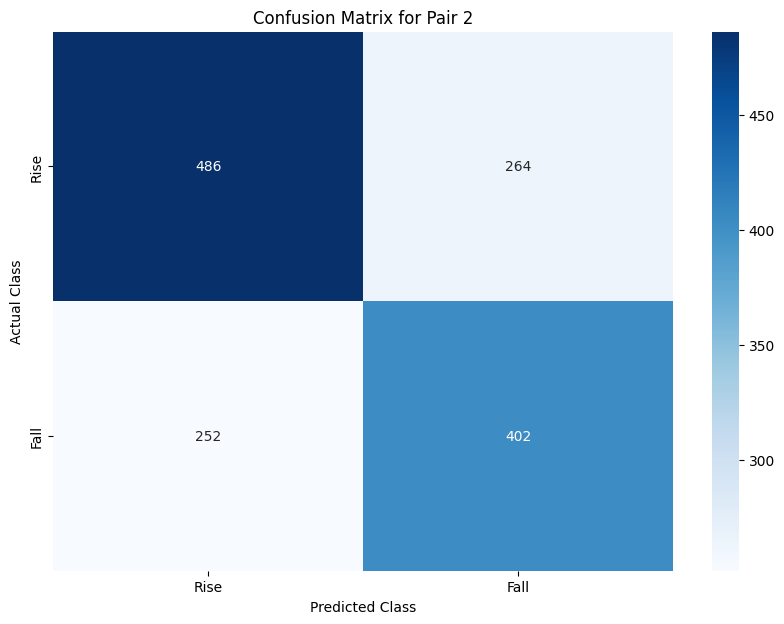

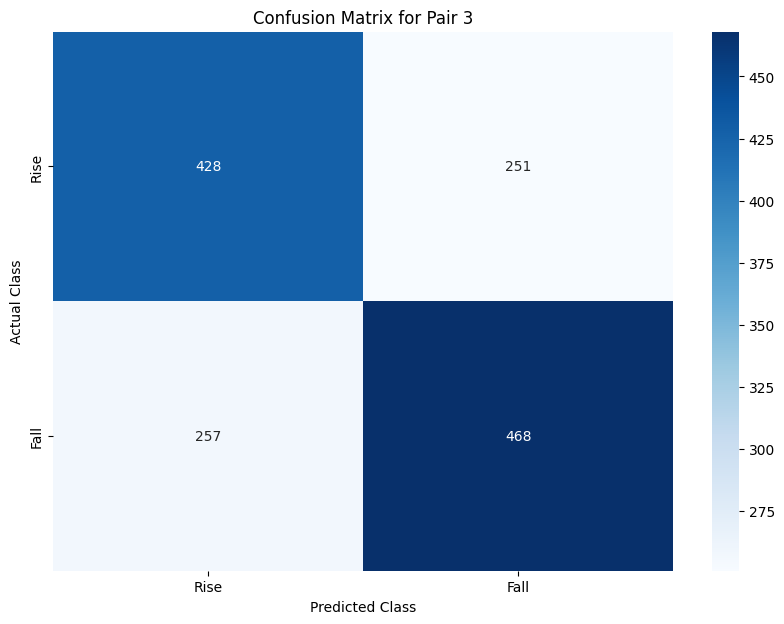

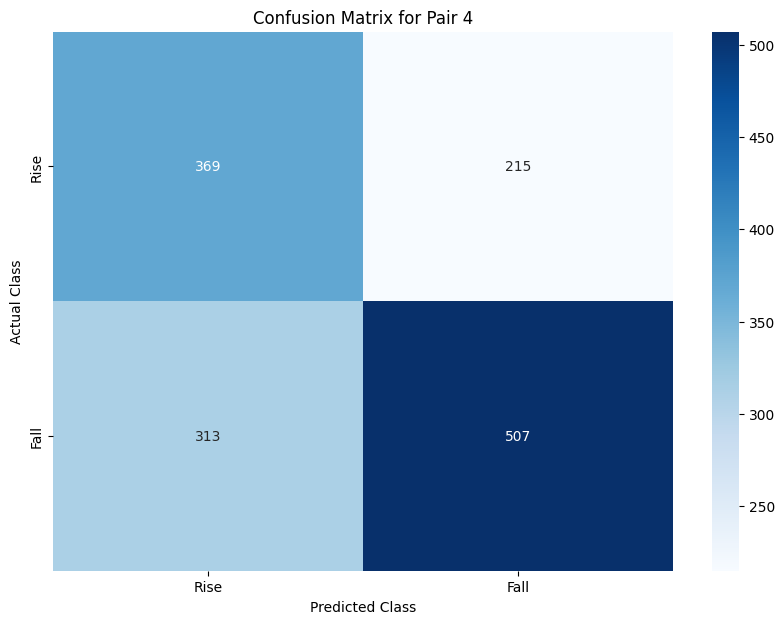

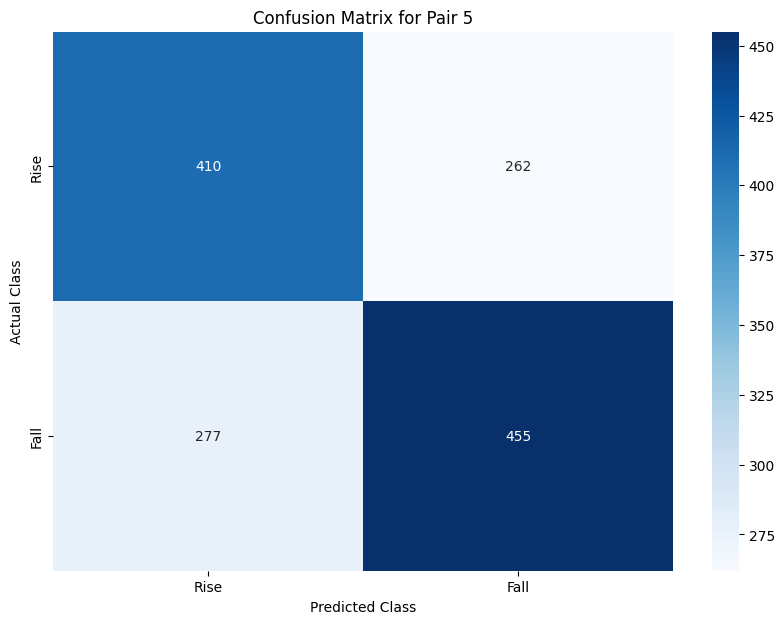

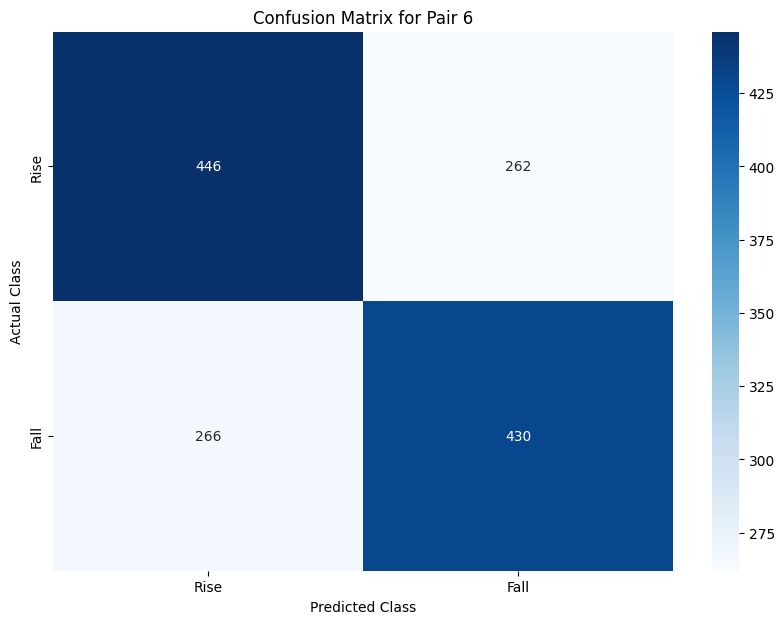

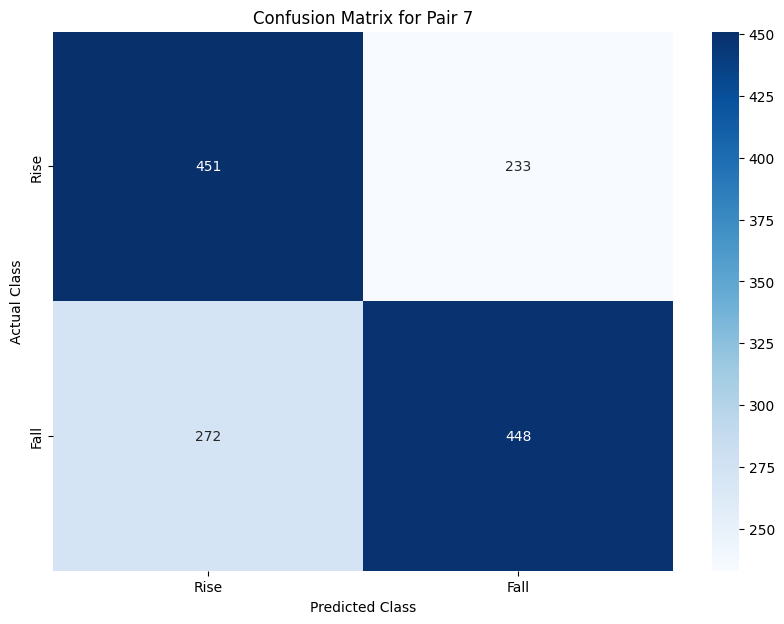

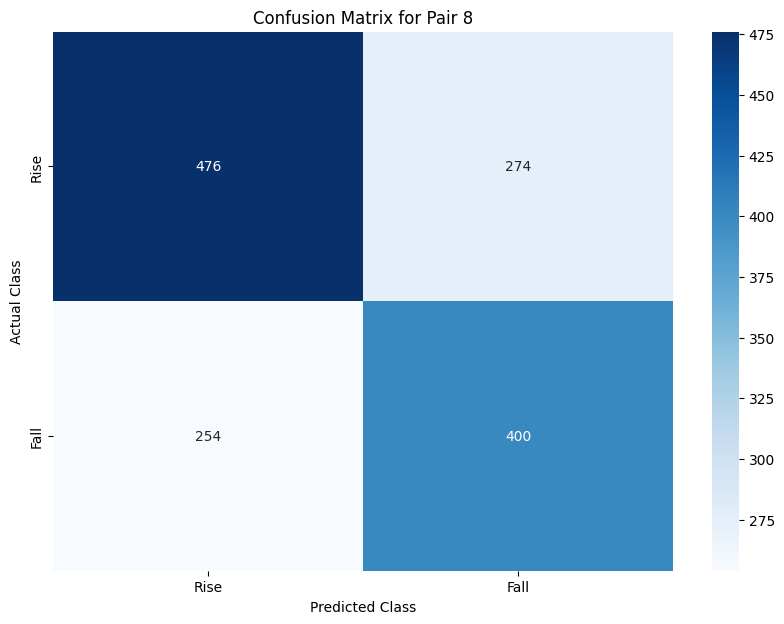

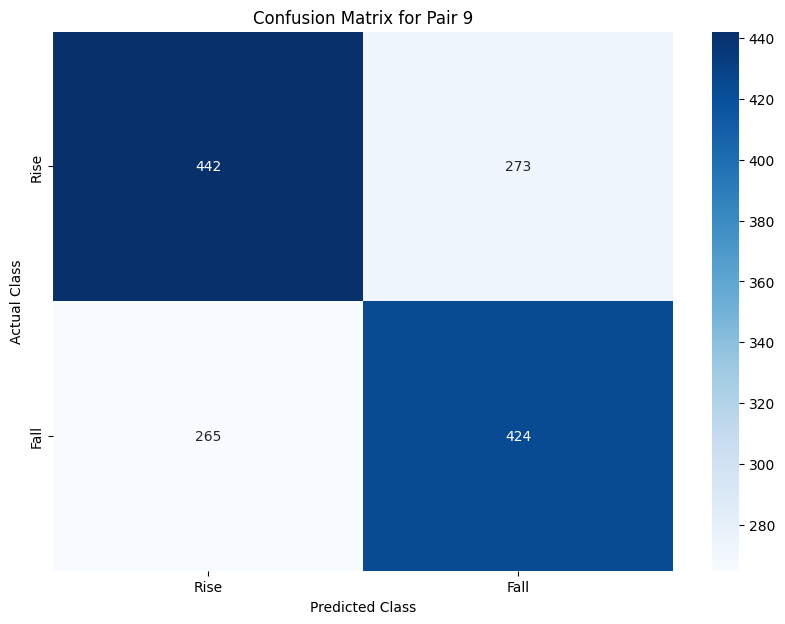

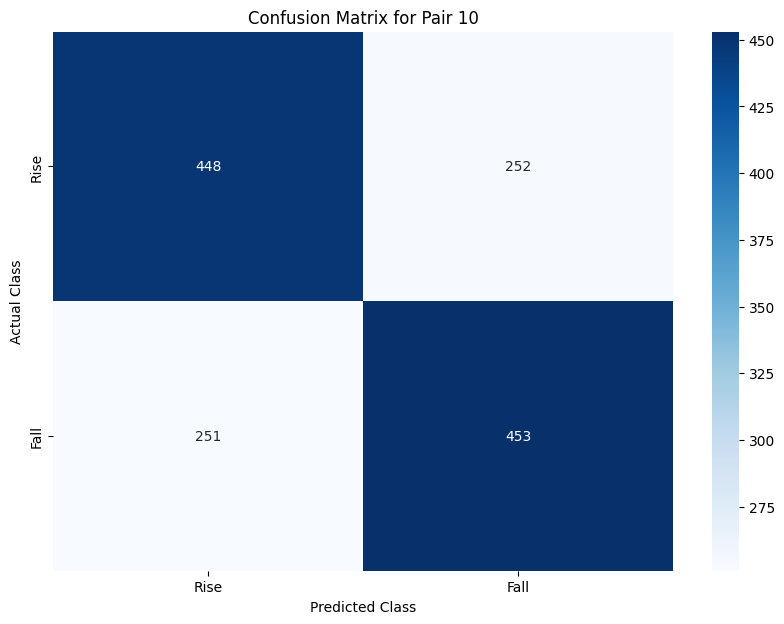

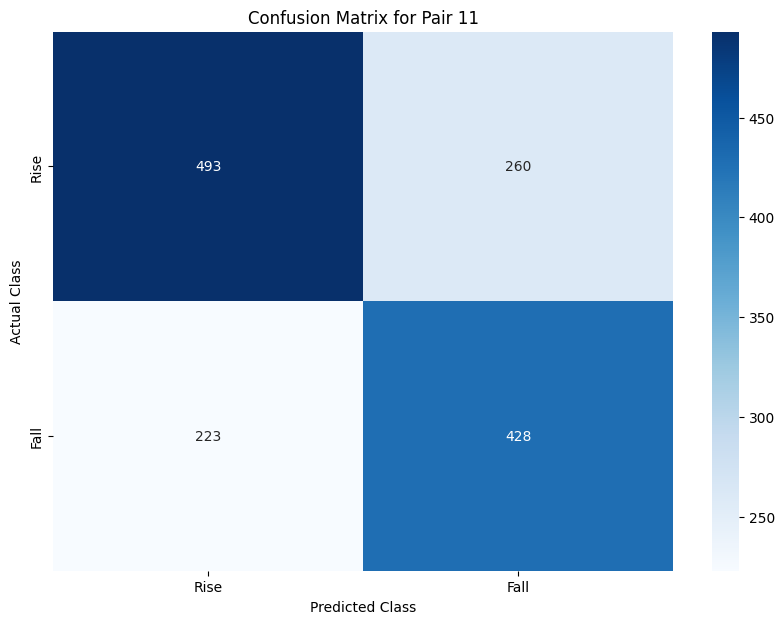

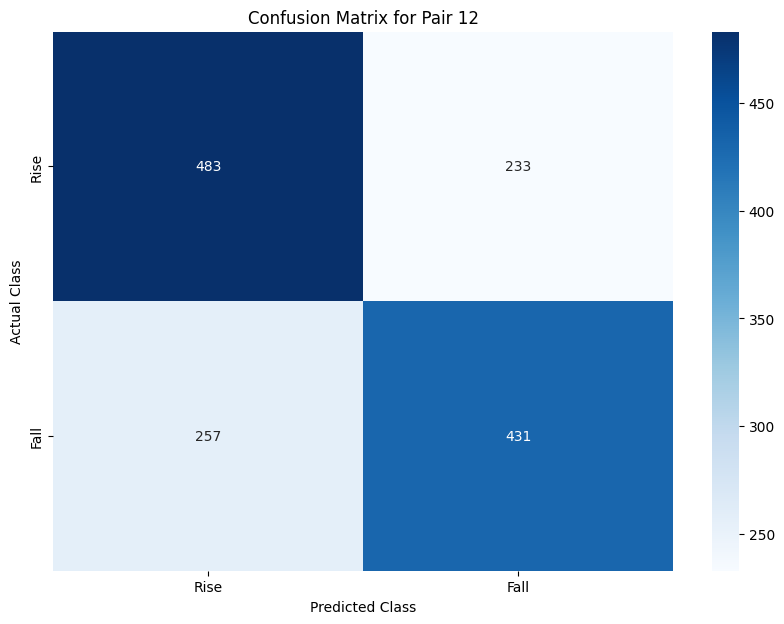

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_accuracy(file_path, actual_data_path, column_number):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Load the actual data
    actual_data = np.loadtxt(actual_data_path, delimiter=',')
    
    # Replace the 'Actual' column with the corresponding column from the actual data
    data['Actual'] = actual_data[-1404:, column_number]
    
    # Check if the signs of 'Predicted' and 'Actual' are the same
    data['Correct'] = np.sign(data['Predicted']) == np.sign(data['Actual'])
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Actual'] > 0))
    TN = np.sum((data['Predicted'] <= 0) & (data['Actual'] <= 0))
    FP = np.sum((data['Predicted'] > 0) & (data['Actual'] <= 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Actual'] > 0))
    
    return accuracy, TP, TN, FP, FN

# Example usage:
results = []
actual_data_path = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\preprocessing\data_90_actual.txt'
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path, actual_data_path, i-1)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend.jpeg')
    plt.show()


# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

In [2]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.611111  169  207  104  132
1      2  0.658497  208  198  100  106
2      3  0.612745  251  125  146   90
3      4  0.596405  148  231   93  140
4      5  0.627451  252  133  153   74
5      6  0.629085  213  172  118  109
6      7  0.622549  176  206  105  125
7      8  0.624183  195  188  127  102
8      9  0.607843  181  193  122  116
9     10  0.617647  204  176  111  121
10    11  0.601307  193  176  121  122
11    12  0.624183  160  224   90  138


In [9]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

def calculate_accuracy(file_path, actual_data_path, column_number):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Load the actual data
    actual_data = np.loadtxt(actual_data_path, delimiter=',')
    
    # Replace the 'Actual' column with the corresponding column from the actual data
    data['Actual'] = actual_data[-len(data):, column_number]
    
    # Check if the signs of 'Predicted' and 'Actual' are the same
    data['Correct'] = np.sign(data['Predicted']) == np.sign(data['Actual'])
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Actual'] > 0))
    TN = np.sum((data['Predicted'] <= 0) & (data['Actual'] <= 0))
    FP = np.sum((data['Predicted'] > 0) & (data['Actual'] <= 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Actual'] > 0))
    
    # Convert continuous predictions to binary class labels
    data['Predicted'] = (data['Predicted'] > 0).astype(int)
    data['Actual'] = (data['Actual'] > 0).astype(int)
    
    # Calculate the AUC
    auc = roc_auc_score(data['Actual'], data['Predicted'])
    
    # Calculate Precision, Recall, F1 Score, and Specificity
    precision = precision_score(data['Actual'], data['Predicted'])
    recall = recall_score(data['Actual'], data['Predicted'])
    f1 = f1_score(data['Actual'], data['Predicted'])
    specificity = TN / (TN + FP)
    
    return accuracy, TP, TN, FP, FN, auc, precision, recall, f1, specificity

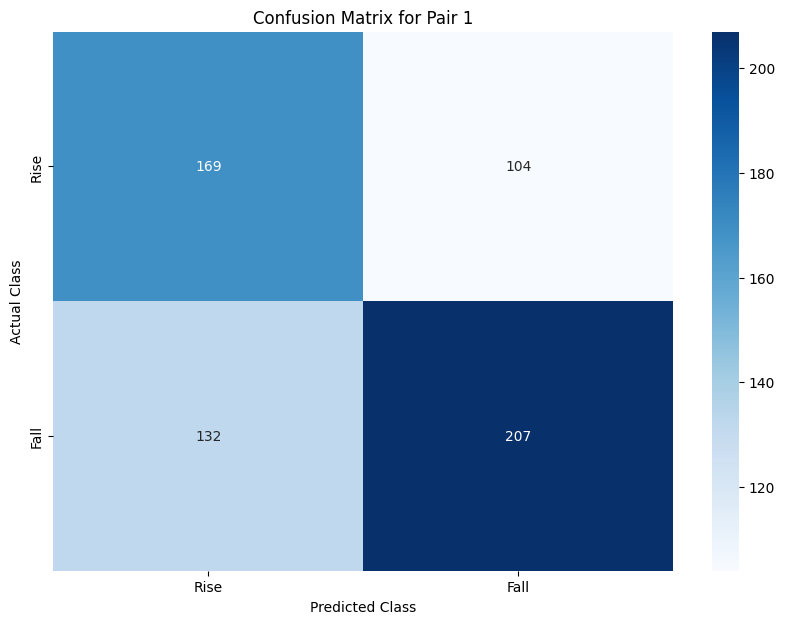

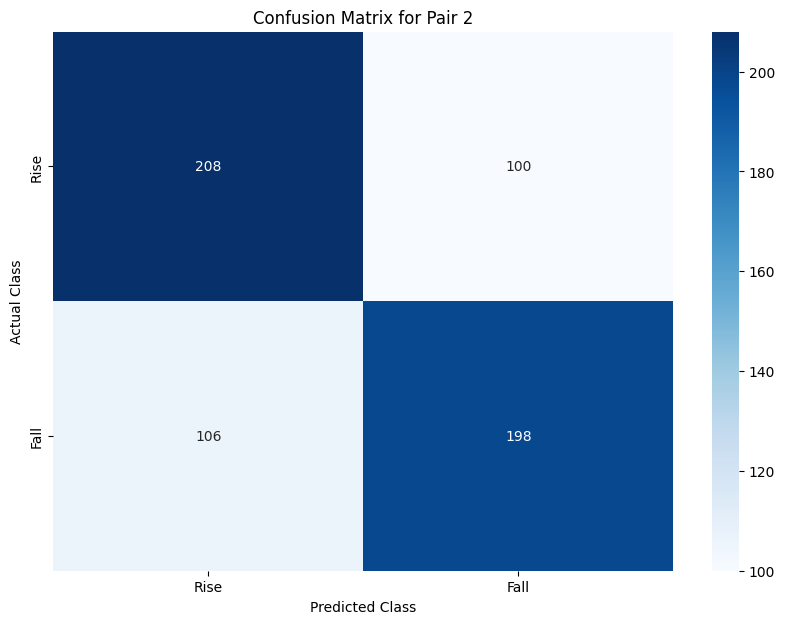

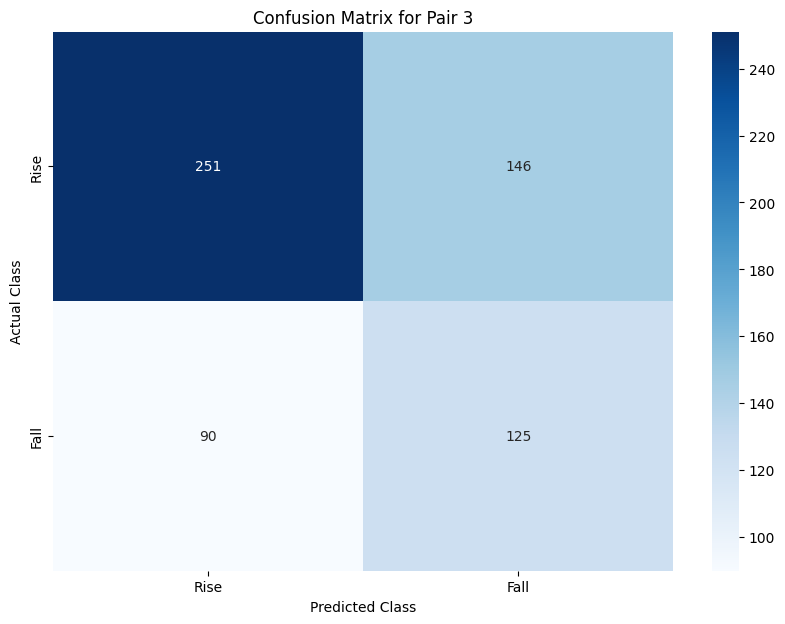

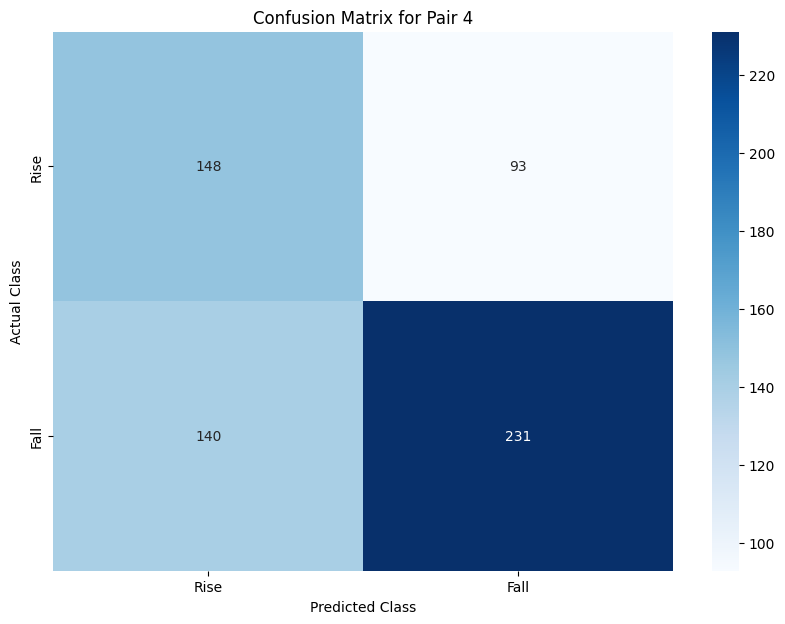

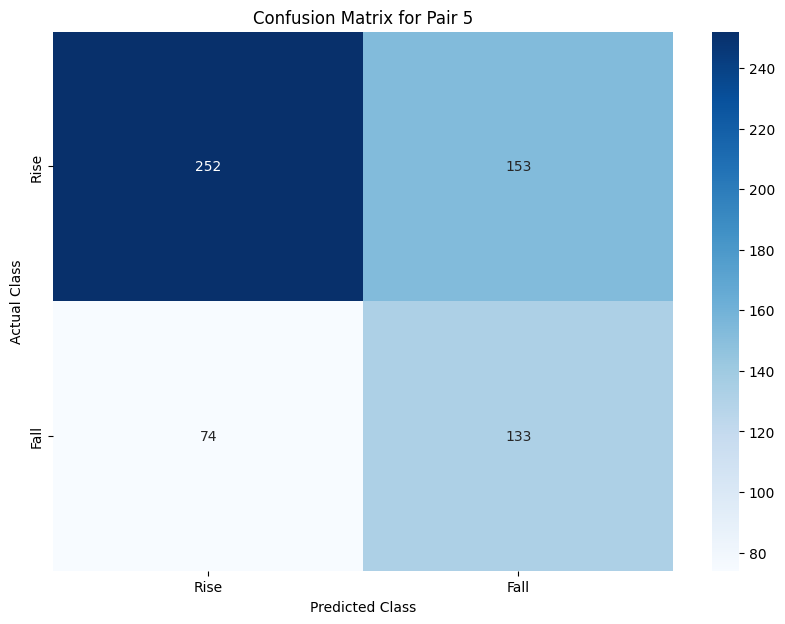

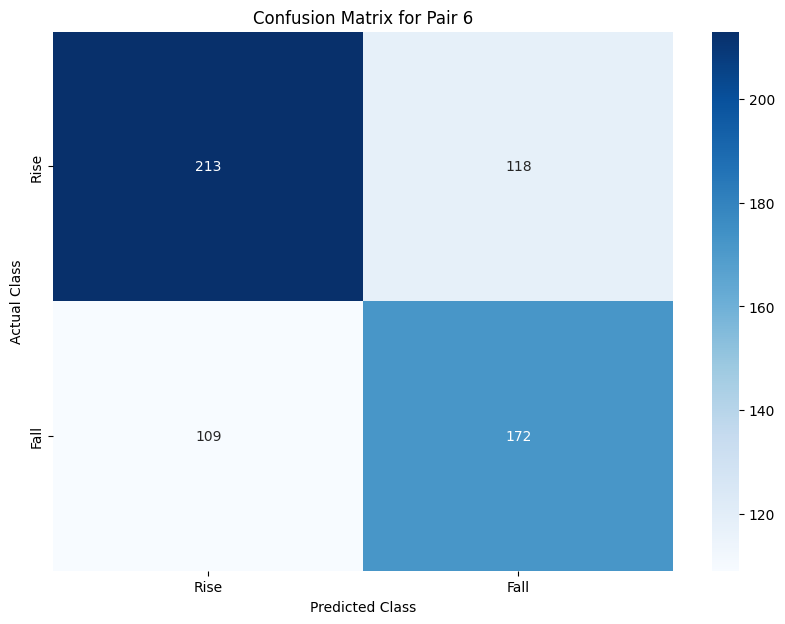

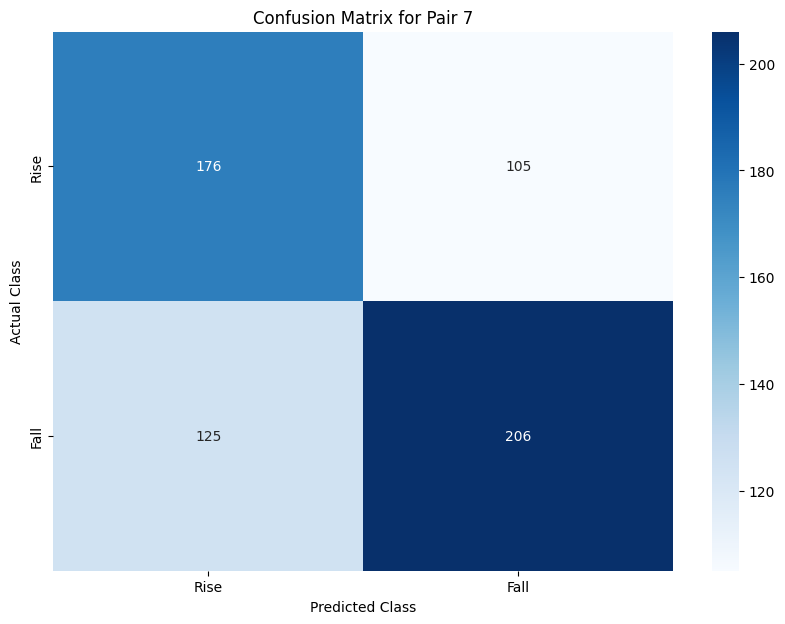

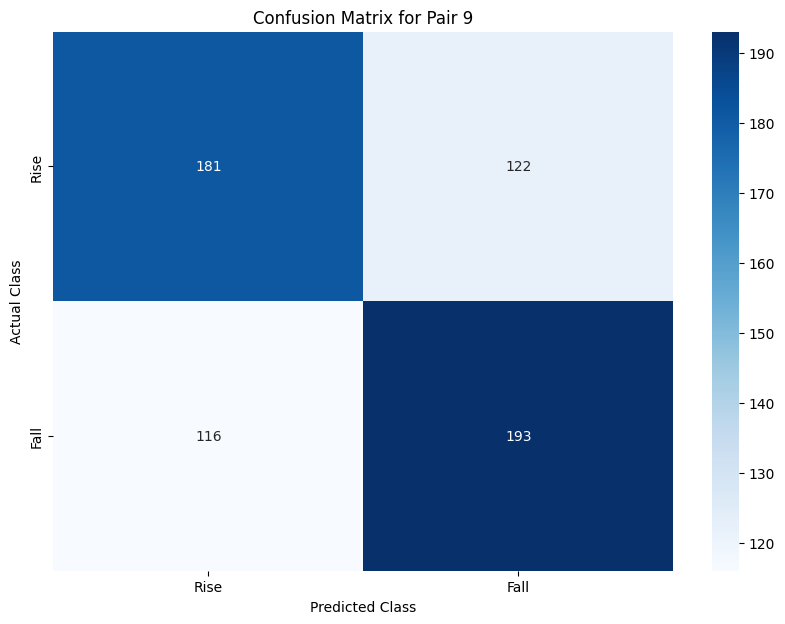

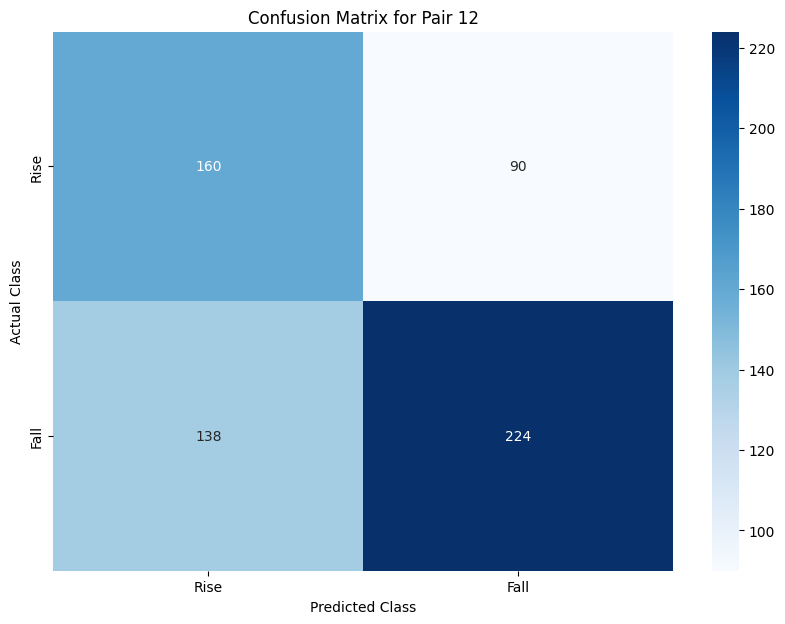

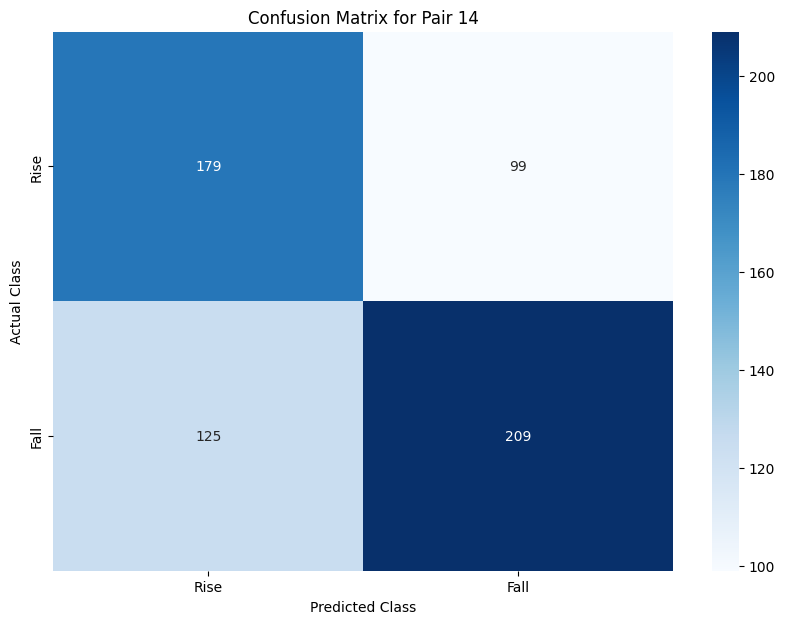

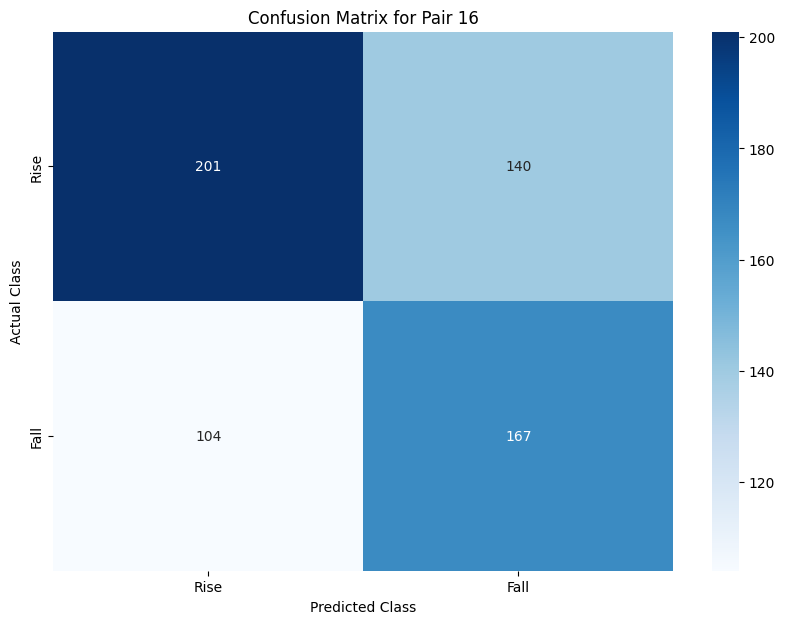

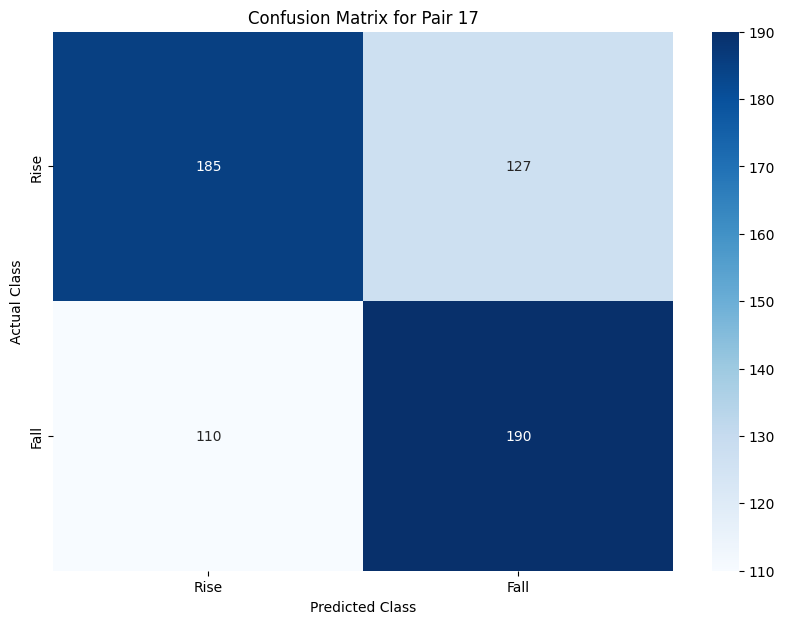

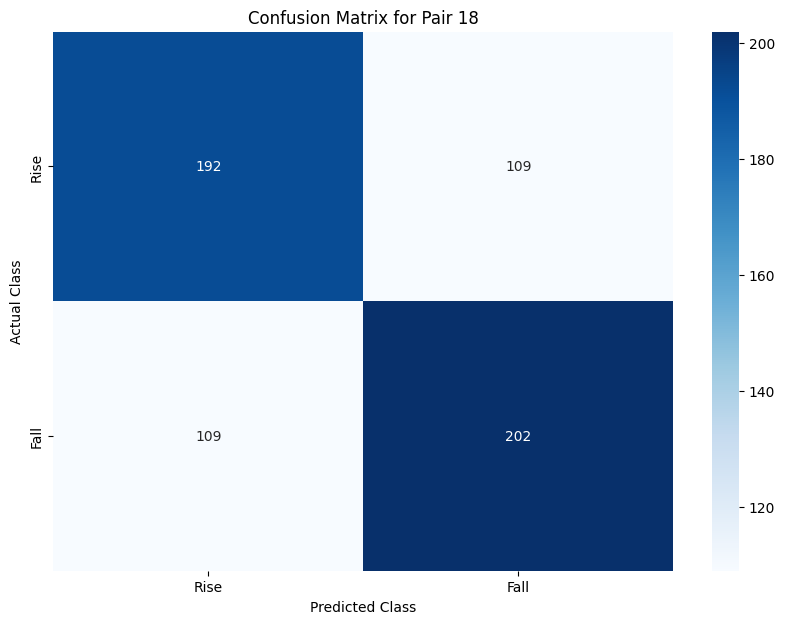

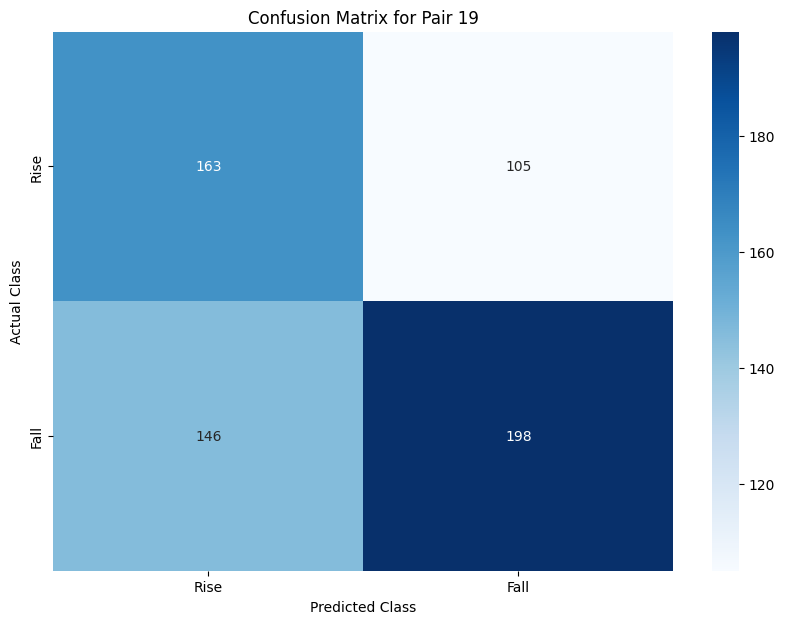

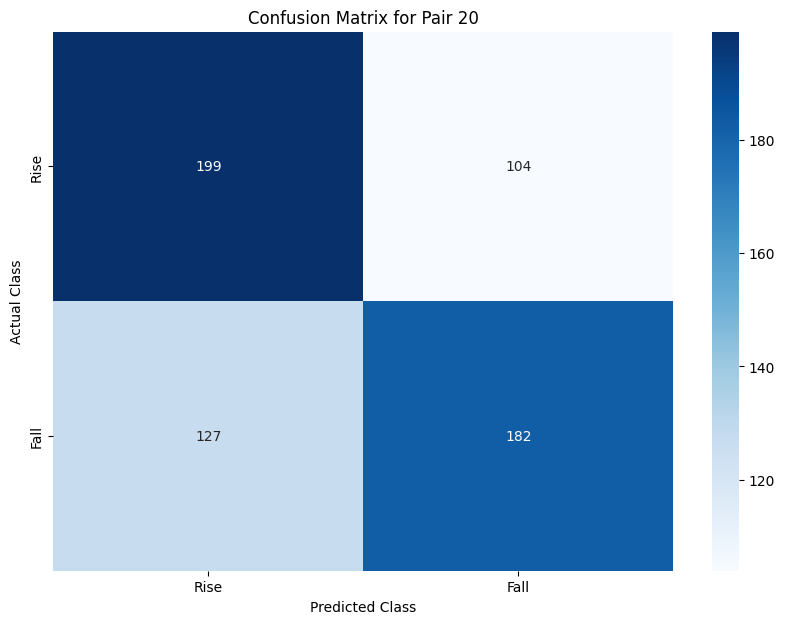

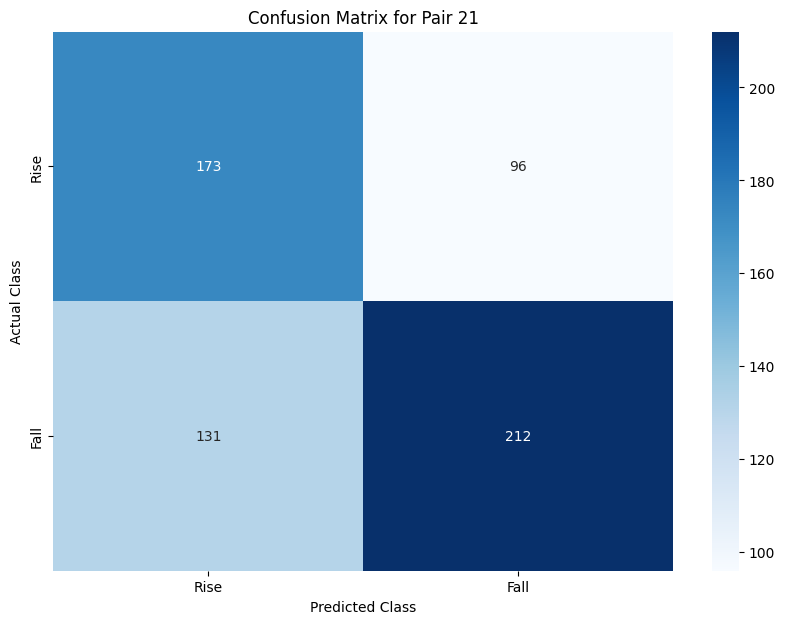

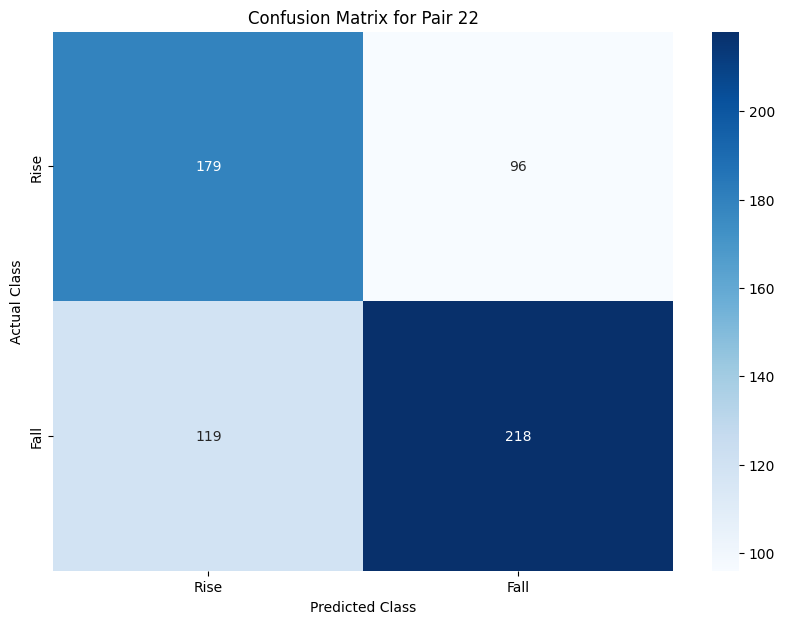

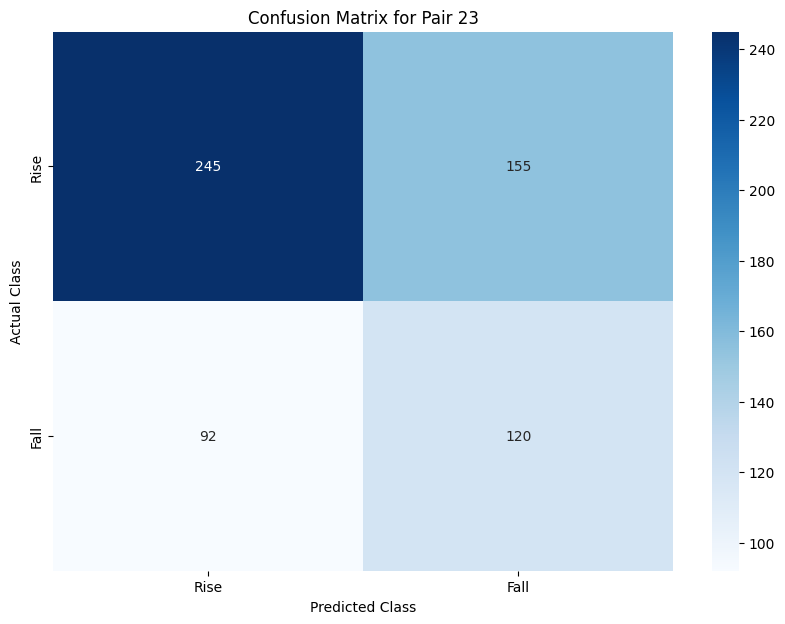

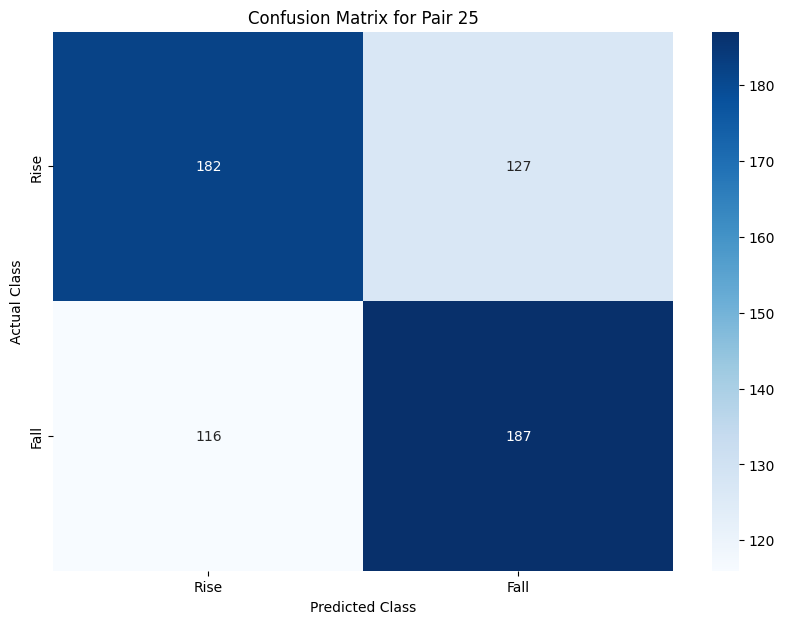

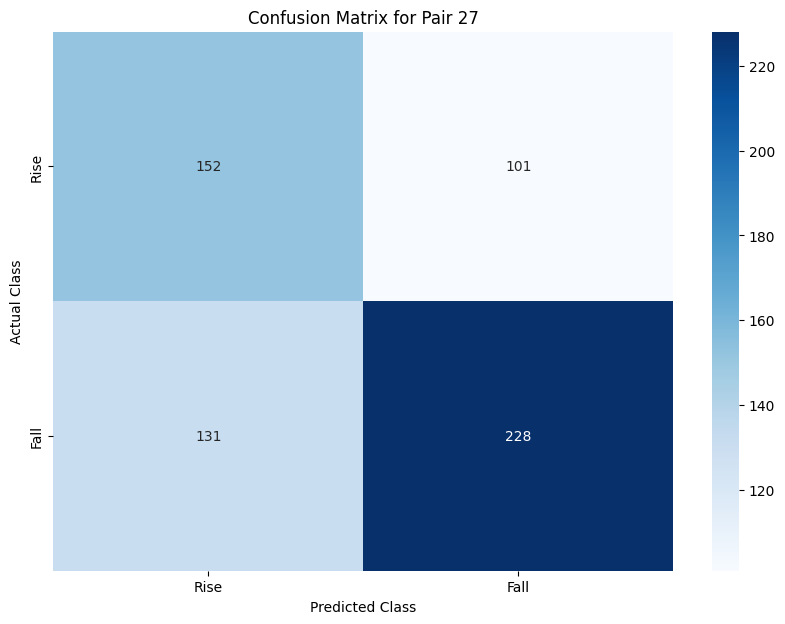

    Pair  Accuracy   TP   TN   FP   FN       AUC  Precision    Recall  \
0      1  0.611111  169  207  104  132  0.613528   0.619048  0.561462   
1      2  0.658497  208  198  100  106  0.663425   0.675325  0.662420   
2      3  0.612745  251  125  146   90  0.598662   0.632242  0.736070   
3      4  0.596405  148  231   93  140  0.613426   0.614108  0.513889   
4      5  0.627451  252  133  153   74  0.619021   0.622222  0.773006   
5      6  0.629085  213  172  118  109  0.627297   0.643505  0.661491   
6      7  0.622549  176  206  105  125  0.623549   0.626335  0.584718   
7      8  0.624183  195  188  127  102  0.626696   0.605590  0.656566   
8      9  0.607843  181  193  122  116  0.611063   0.597360  0.609428   
9     10  0.617647  204  176  111  121  0.620466   0.647619  0.627692   
10    11  0.601307  193  176  121  122  0.602646   0.614650  0.612698   
11    12  0.624183  160  224   90  138  0.625144   0.640000  0.536913   
12    13  0.614379  184  194  111  123  0.617707   

In [10]:
# Example usage:
results = []
actual_data_path = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\preprocessing\JSE_data_90_actual.txt'
for i in range(1, 31):  # Assuming pairs are numbered from 1 to 30
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN, auc, precision, recall, f1, specificity = calculate_accuracy(file_path, actual_data_path, i-1)
    results.append({
        'Pair': i, 
        'Accuracy': accuracy, 
        'TP': TP, 
        'TN': TN, 
        'FP': FP, 
        'FN': FN, 
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity
    })

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

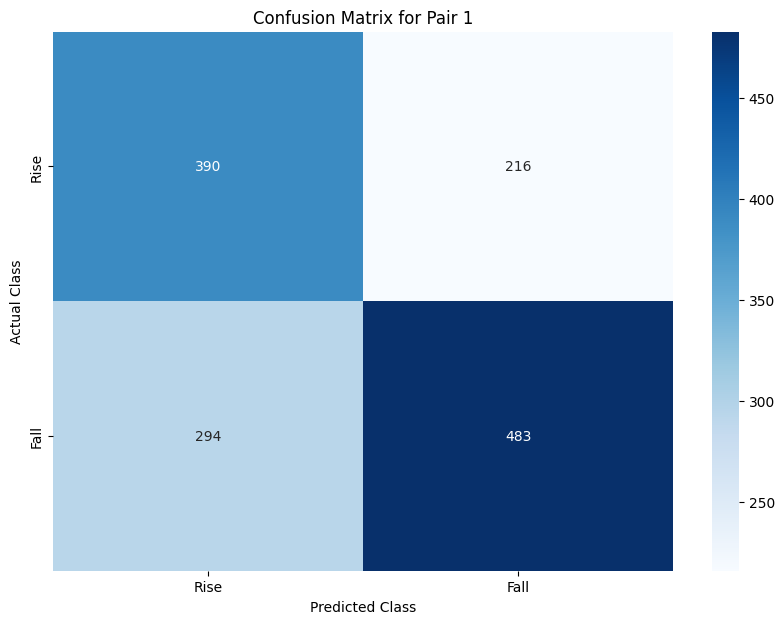

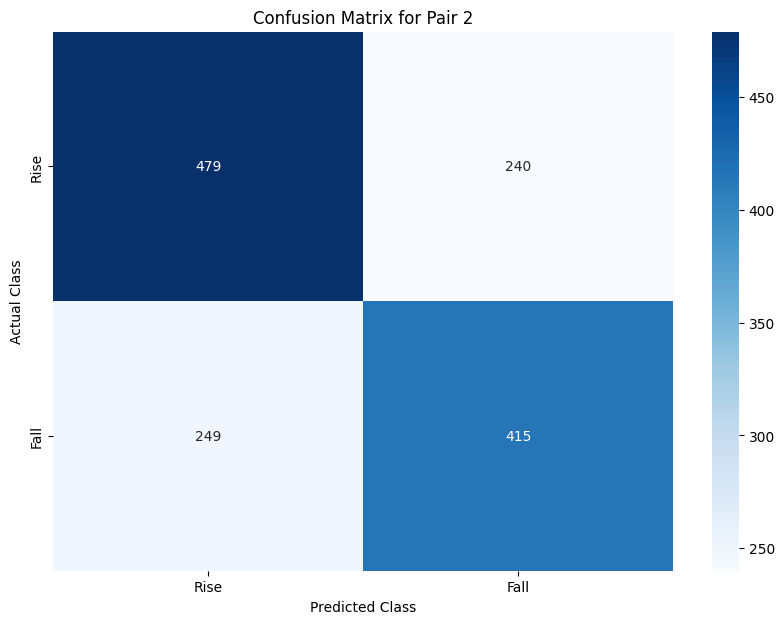

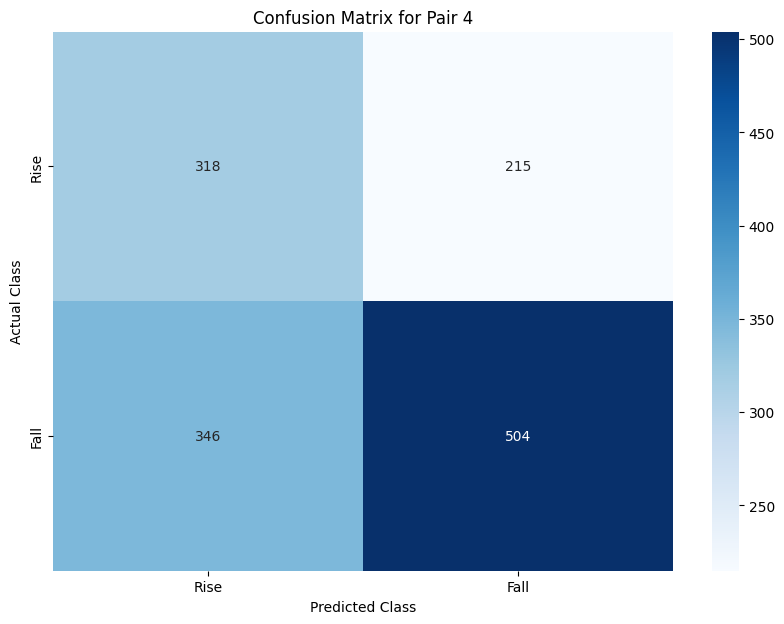

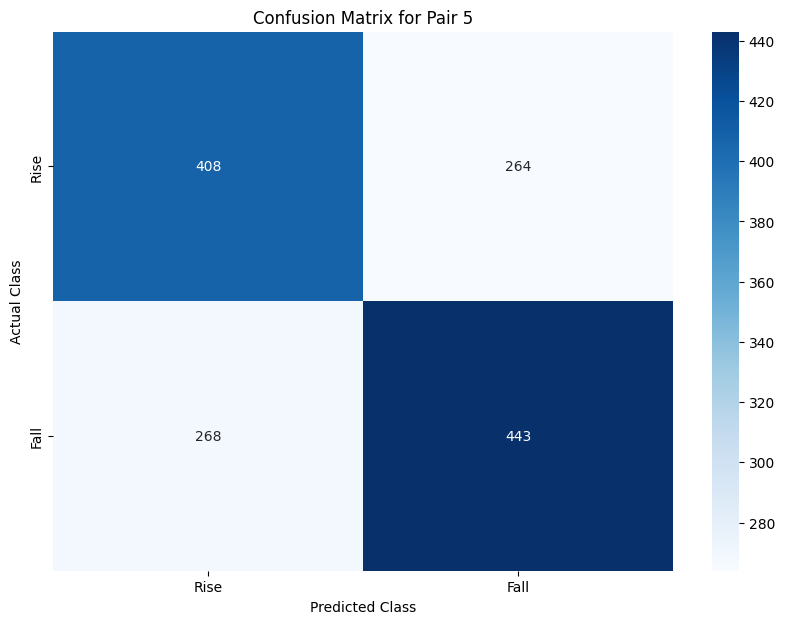

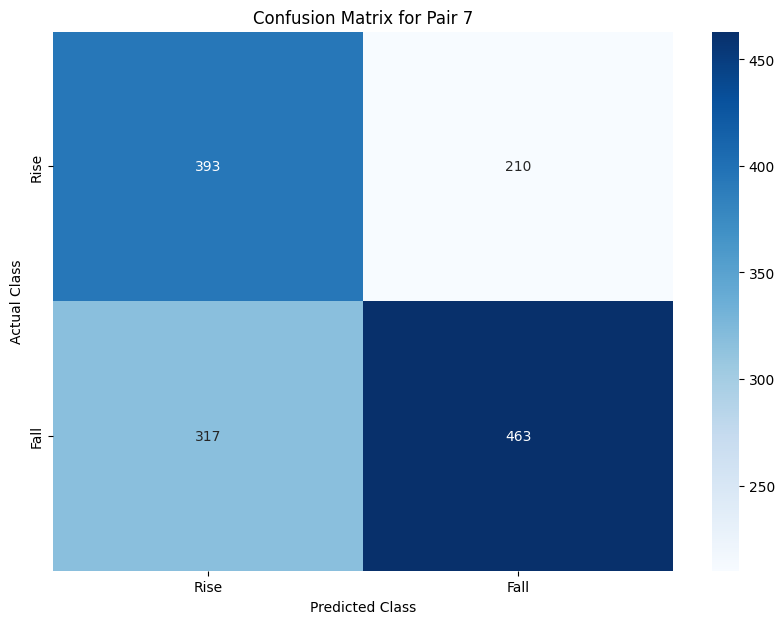

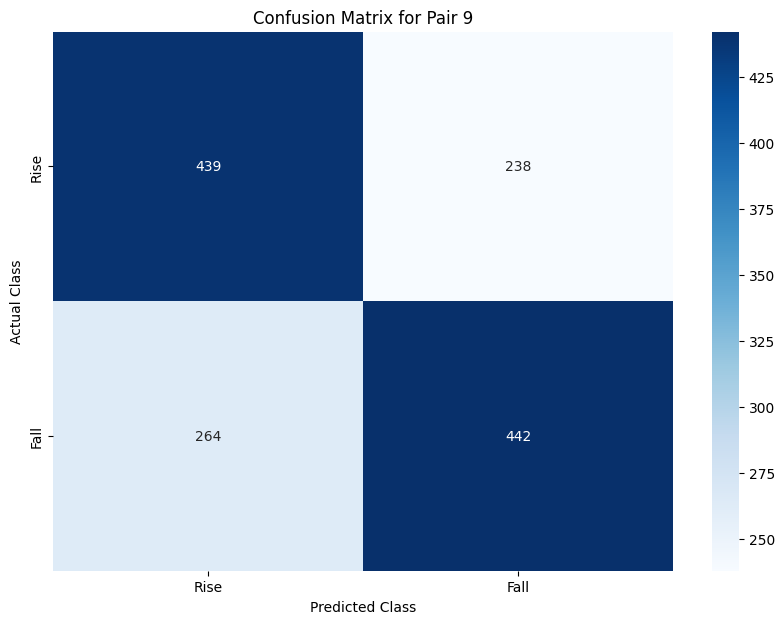

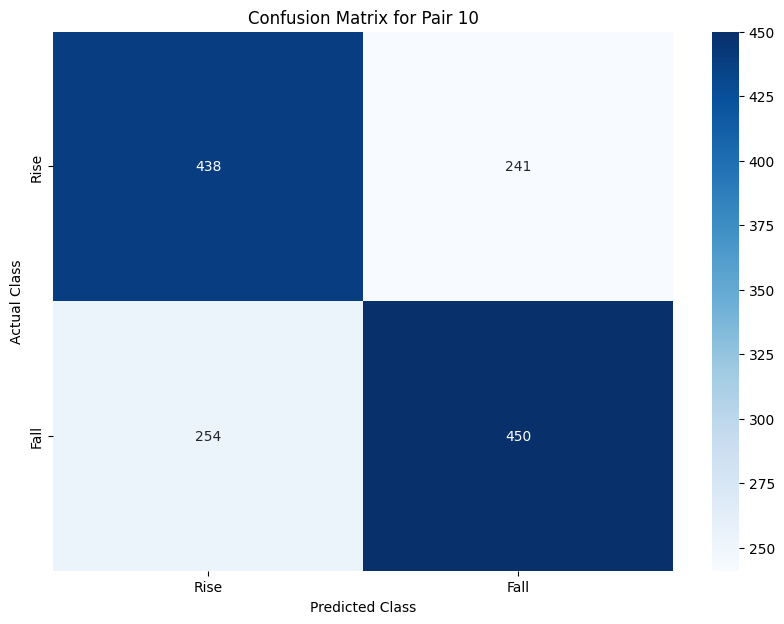

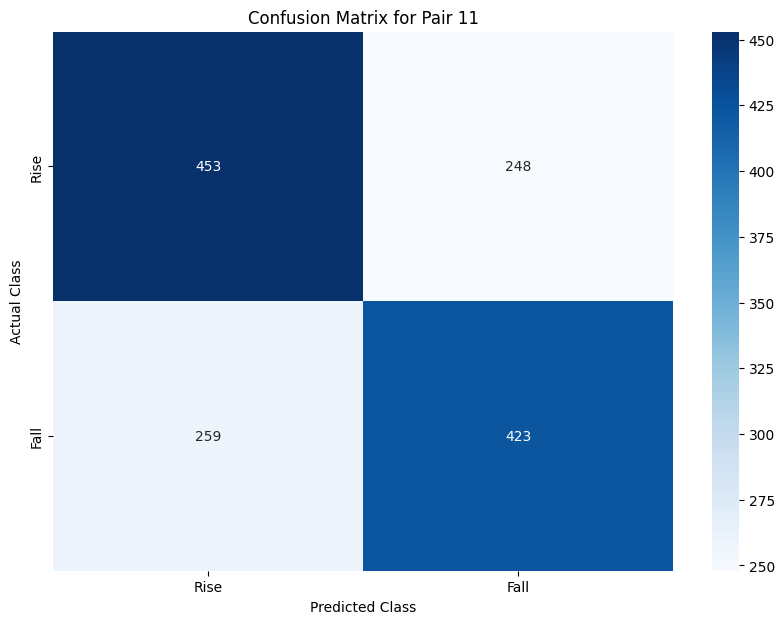

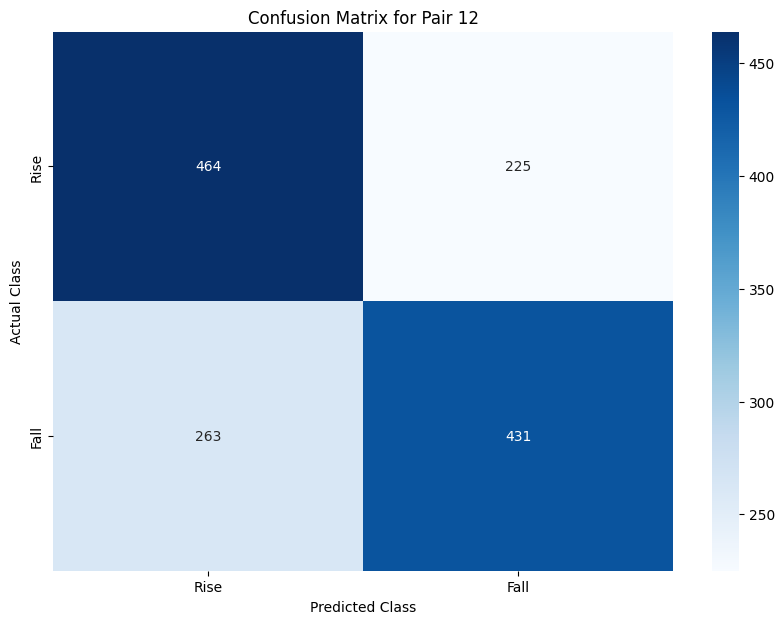

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.631236  390  483  216  294
1      2  0.645698  479  415  240  249
2      3  0.652928  421  482  223  257
3      4  0.594360  318  504  215  346
4      5  0.614606  408  443  264  268
5      6  0.647144  455  440  236  252
6      7  0.618944  393  463  210  317
7      8  0.616052  460  392  283  248
8      9  0.637021  439  442  238  264
9     10  0.641359  438  450  241  254
10    11  0.633406  453  423  248  259
11    12  0.647144  464  431  225  263


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_accuracy(file_path, actual_data_path, column_number):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Load the actual data
    actual_data = np.loadtxt(actual_data_path, delimiter=',')
    
    # Replace the 'Actual' column with the corresponding column from the actual data
    data['Actual'] = actual_data[-len(data):, column_number]
    
    # Check if the signs of 'Predicted' and 'Actual' are the same
    data['Correct'] = np.sign(data['Predicted']) == np.sign(data['Actual'])
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Actual'] > 0))
    TN = np.sum((data['Predicted'] <= 0) & (data['Actual'] <= 0))
    FP = np.sum((data['Predicted'] > 0) & (data['Actual'] <= 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Actual'] > 0))
    
    return accuracy, TP, TN, FP, FN

# Example usage:
results = []
actual_data_path = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\preprocessing\data_128_actual.txt'
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path, actual_data_path, i-1)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}_trend.jpeg')
    plt.show()


# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)